# 4. Dinâmica da Partícula
Professor Paulo Victor <br>
E-mail: paulo.gomes@cefet-rj.br <br>
CEFET-RJ Campus Angra dos Reis Sala 17C

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

#### 4.1 Introdução

No Natal de 1642, o ano que Galileu morreu,em Londres, nasceu um pequenino bebê, chamado de Isaac, filho de Isaac e Hanna Newton. E assim nasceu o pai da Mecânica. 
Em 1665, Newton era um estudante da Universidade de Cambridge, neste ano a a Inglaterra foi assolada por uma epidemia de peste bubônica, forçando uma quarentena de dois anos. Nesse período, o jovem de 23 anos concebeu a lei da gravitação, as leis de movimentos e desenvolveu os conceitos básicos do cálculo diferencial. Devido a pequenas discrepâncias em sua explicação sobre o movimento da lua, Newton engavetou todos esses trabalhos por 20 anos. <br>
É dado a Edmund Halley, descobridor do cometa Halley, o crédito de trazer as descobertas de Newton a conhecimento público. Um dia, em 1685, Halley conversava casualmente com Cristopher Wren e Robert Hooke sobre a teoria de Descartes que explicava o movimento dos planetas. Insatisfeitos com essa teoria, eles especulavam se não existiria uma força similar ao magnetismo que faria com que os planetas se movessem em órbitas elípticas. Hooke fez uma aposta com Wren que conseguiria formar uma teoria que explicasse essa especulação em duas semanas. Vários meses depois, Halley visitou Newton em Cambridge e, sem mencionar a aposta, casualmente perguntou: "Se o sol puxasse os planetas com uma força inversamente proporcional ao quadrado da distância, qual trajetória os planetas percorreriam?" Para a surpresa de Halley, Newton respondeu sem exitar: "Órbitas elípticas, é claro, por quê? Eu já até fiz esses cálculos e eu tenho a prova entre as minhas anotações em alguma gaveta por aqui. Me dê alguns dias que eu vou procurar isso e te mostro." As anotações as quais Newton se referia, eram essas que ele escreveu durante a quarentena de 1685 e ficaram engavetadas por 20 anos. <br>
Alguns dias depois, Newton mostrou as anotações a Halley. Após se recuperar do choque, Halley aconselhou o amigo a desenvolver esses estudos completamente e a publicá-los. Dois anos depois, em 1987, Newton publicou o livro *Philosophiæ Naturalis Principia Mathematica* (Princípios Matemáticos da Filosofia Natural), ou simplesmente *Principia*. Esse livrou lançou as bases para a Mecânica Clássica e foi de fundamental importância para muitos avanços da primeira revolução industrial. 

### 4.1.1 Leis de Newton
1. Todo corpo continua em seu estado de repouso ou de movimento uniforme em linha reta a menos que seja compelido a mudar de estado devido a forças sobre ele impressas. 
2. A taxa  de mudança da quantidade de movimento linear é proporcional à força impressa e está na mesma direção desta força.
3. A toda ação, sempre existe uma reação em sentido oposto e igual intensidade. 

## 4.2 Vetor Quantidade de Movimento Linear

Podemos definir o **vetor quantidade de movimento linear** da partícula $P$ como:

$ {}^{N} \vec{G} {}^{P} = m {}^{N} \vec{v}{}^{P} $
* Na ausência de forças externas, o vetor quantidade de movimento se conserva (**1 Lei de Newton**).

In [8]:
from IPython.display import Image,Math

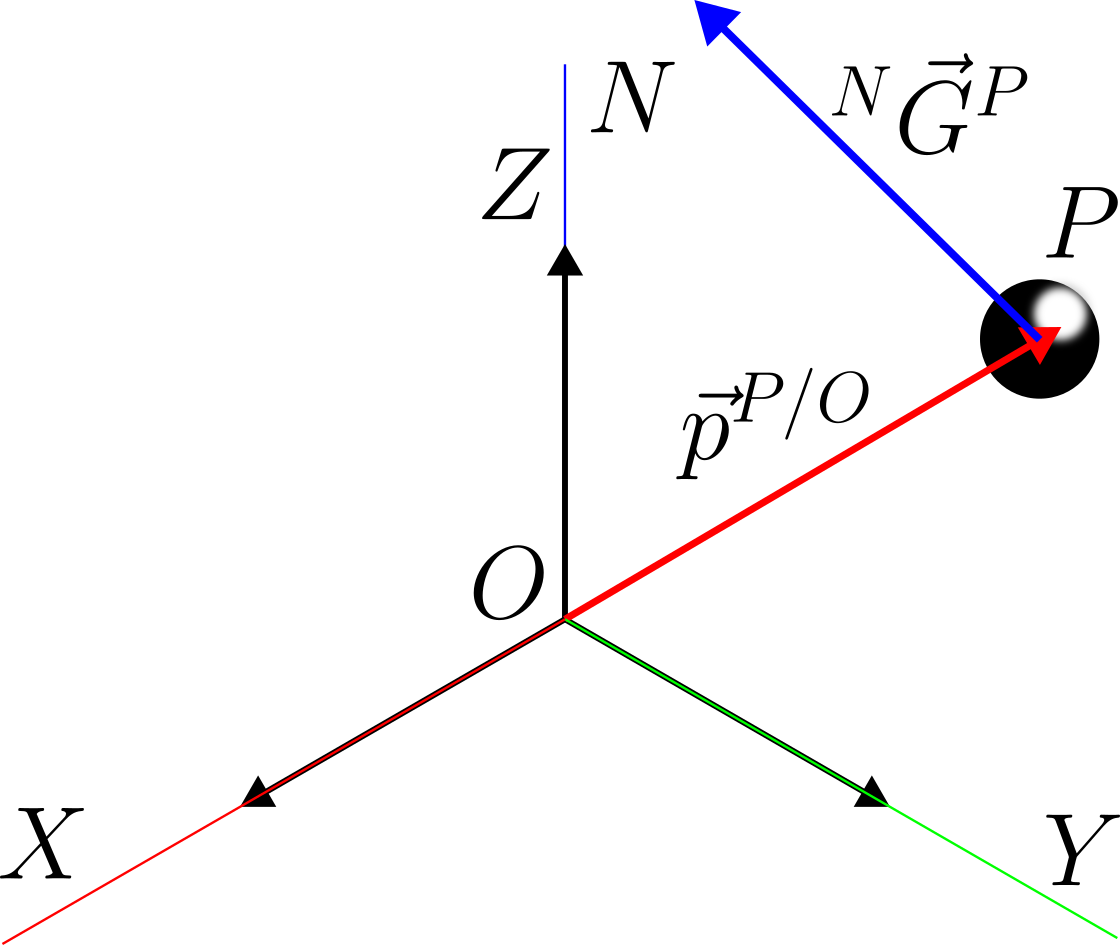

In [9]:
Image('partícula01G.png',width=500)

In [10]:
from sympy import *
import sympy.physics.mechanics as me

In [11]:
x,y,z = me.dynamicsymbols('x y z')
m = symbols('m')

In [12]:
N = me.ReferenceFrame('N')

In [13]:
O = me.Point('O')
O.set_vel(N,0)

In [14]:
P = me.Point('P')
pPO = x*N.x + y*N.y + z*N.z
P.set_pos(O,pPO)
P.set_vel(N,pPO.dt(N))

In [15]:
P.vel(N)

Derivative(x(t), t)*N.x + Derivative(y(t), t)*N.y + Derivative(z(t), t)*N.z

In [16]:
P.acc(N)

Derivative(x(t), (t, 2))*N.x + Derivative(y(t), (t, 2))*N.y + Derivative(z(t), (t, 2))*N.z

Vamos informar ao python que iremos utilizar o modelo de partícula:

In [18]:
ParP = me.Particle('ParP',P,m)

O **vetor quantidade de movimento linear** da partícula $P$ em relação a $N$, ${}^{N} \vec{G}{}^{P}$, pode ser obtido automaticamente:

In [20]:
ParP.linear_momentum(N)

m*Derivative(x(t), t)*N.x + m*Derivative(y(t), t)*N.y + m*Derivative(z(t), t)*N.z

É conveniente guardar essa informação em uma variável:

In [22]:
G_P = ParP.linear_momentum(N)
G_P

m*Derivative(x(t), t)*N.x + m*Derivative(y(t), t)*N.y + m*Derivative(z(t), t)*N.z

In [23]:
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/FuDMJixyuNA",560,315)

### Exemplo 1:

Um carro foguete se move ao longo de uma pista reta de acordo com a equação $x = 3t^3 + t + 2$, onde $x$ está em metros e $t$ em segundos. A estrutura do carro foguete possui a massa $m_{car}$ e suponha que a massa do combustível é consumida segundo a equação $m_f = 250e^{-5t}$. Obtenha o vetor quantidade de movimento linear do carro foguete.

In [25]:
t = me.dynamicsymbols._t

In [26]:
s = 3*t**3 + t + 2

In [27]:
mcar = symbols('m_car')

In [28]:
v = s.diff(t)

Math(rf'v = {latex(v)}')

<IPython.core.display.Math object>

In [29]:
mf = 250*exp(-0.5*t)

Math(rf'mf = {latex(mf)}')

<IPython.core.display.Math object>

Embora seja um problema undimensional, vamos criar uma base vetorial para usarmos os comandos que aprendemos.

In [31]:
N = me.ReferenceFrame('N')

In [32]:
O = me.Point('O')
O.set_vel(N,0)

In [33]:
F = me.Point('F')
F.set_pos(O,s*N.x)
F.set_vel(N,v*N.x)

In [34]:
ParF = me.Particle('ParF',F,mf+mcar)

In [35]:
G_F = ParF.linear_momentum(N)

Math(rf'$\vec{{G}}^F = {latex(G_F)}')

<IPython.core.display.Math object>

## 4.3 Segunda Lei de Newton

Podemos entender a segunda lei de Newton como: 
* A variação no tempo do vetor quantidade de movimento linear é igual ao vetor resultante das forças aplicadas ao sistema.

Para uma partícula $P$ submetida a $n$ forças, podemos escrever matematicamente a segunda lei de Newton como:

$\sum^{n}_{i=1} \vec{F}_{i} = \dfrac{{}^{N} d {}^{N} \vec{G}{}^{P}}{dt}$

 

Onde ${}^{N} \vec{G}{}^{P} = m {}^{N}\vec{v} {}^{P} $ e $N$  é um sistema de referência inercial. 

Por enquanto, o nosso sistema se resume a uma única partícula. Observa-se que tudo o que for aprendido na dinâmica de partículas poderá ser extendido para a dinâmica de sistemas de partículas e dinâmica de corpos rígidos.

### Exemplo 2:
Voltando ao sistema do **Exemplo 1**, obtenha uma expressão para a resultande das forças atuantes no carro foguete.

In [40]:
Math(rf'$\vec{{G}}^F = {latex(G_F)}')

<IPython.core.display.Math object>

In [41]:
Res_F = G_F.dt(N)

Math(rf'\vec{{R}}^F = {latex(Res_F)}')

<IPython.core.display.Math object>

In [42]:
Res_F_esc = Res_F.dot(N.x).subs(mcar,500)

Math(rf'R^F = {latex(Res_F_esc)}')

<IPython.core.display.Math object>

In [43]:
from numpy import linspace
import matplotlib.pyplot as plt

In [44]:
lam_x = lambdify(t,Res_F_esc,modules = ['numpy'])
x_vals = linspace(0,5,100)
y_vals = lam_x(x_vals)

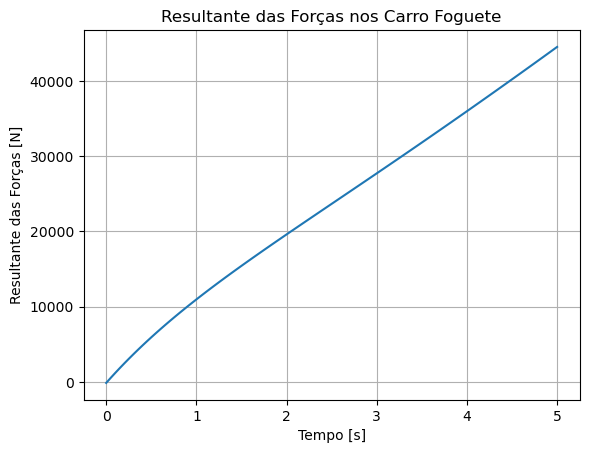

In [45]:
plt.figure()
plt.plot(x_vals,y_vals)
plt.xlabel('Tempo [s]')
plt.ylabel('Resultante das Forças [N]')
plt.title('Resultante das Forças nos Carro Foguete')
plt.grid(True)

## 4.4 Cinética

A **Cinética** é o estudo das forças que causam o movimento. Estudaremos as seguintes modelagens de forças: 
* Gravitacionais
* Eletroestáticas
* Magnéticas
* De contato entre superfícies sólidas
* Exercidas por fluidos
* Exercidas por cabos flexíveis e barras rígidas
* Exercidas por molas
* Exercidas por amortecedores viscosos

De modo geral, podemos classificar as forças em:
* Forças de campo
* Forças de contato

Forças são **grandezas vetorias**. Modelamos forças como vetores deslizantes.

### 4.4.1 Vetores Vinculados, Deslizantes e Livres
* Vetores Vinculados:
    - A caracterização de um vetor vinculador requer a descrição de seus componentes em uma dada base e as coordenadas de seu ponto de aplicação. Exemplo: velocidade de uma partícula.
* Vetores Deslizantes:
    - O efeito da ação de uma força sobre um corpo rígido depende da sua linha de ação. Duas forças com os mesmos componentes vetoriais, mas com linhas de ação diferentes são forças diferentes. A caracterização de um vetor deslizante requer a descrição dos seus componentes em uma dada base e a descrição da reta suporte. Exemplo: força aplicada sobre um corpo rígido. 
* Vetores Livres: 
    - Sua localização no espaço não importa. Exemplo: velocidade angular e torque.

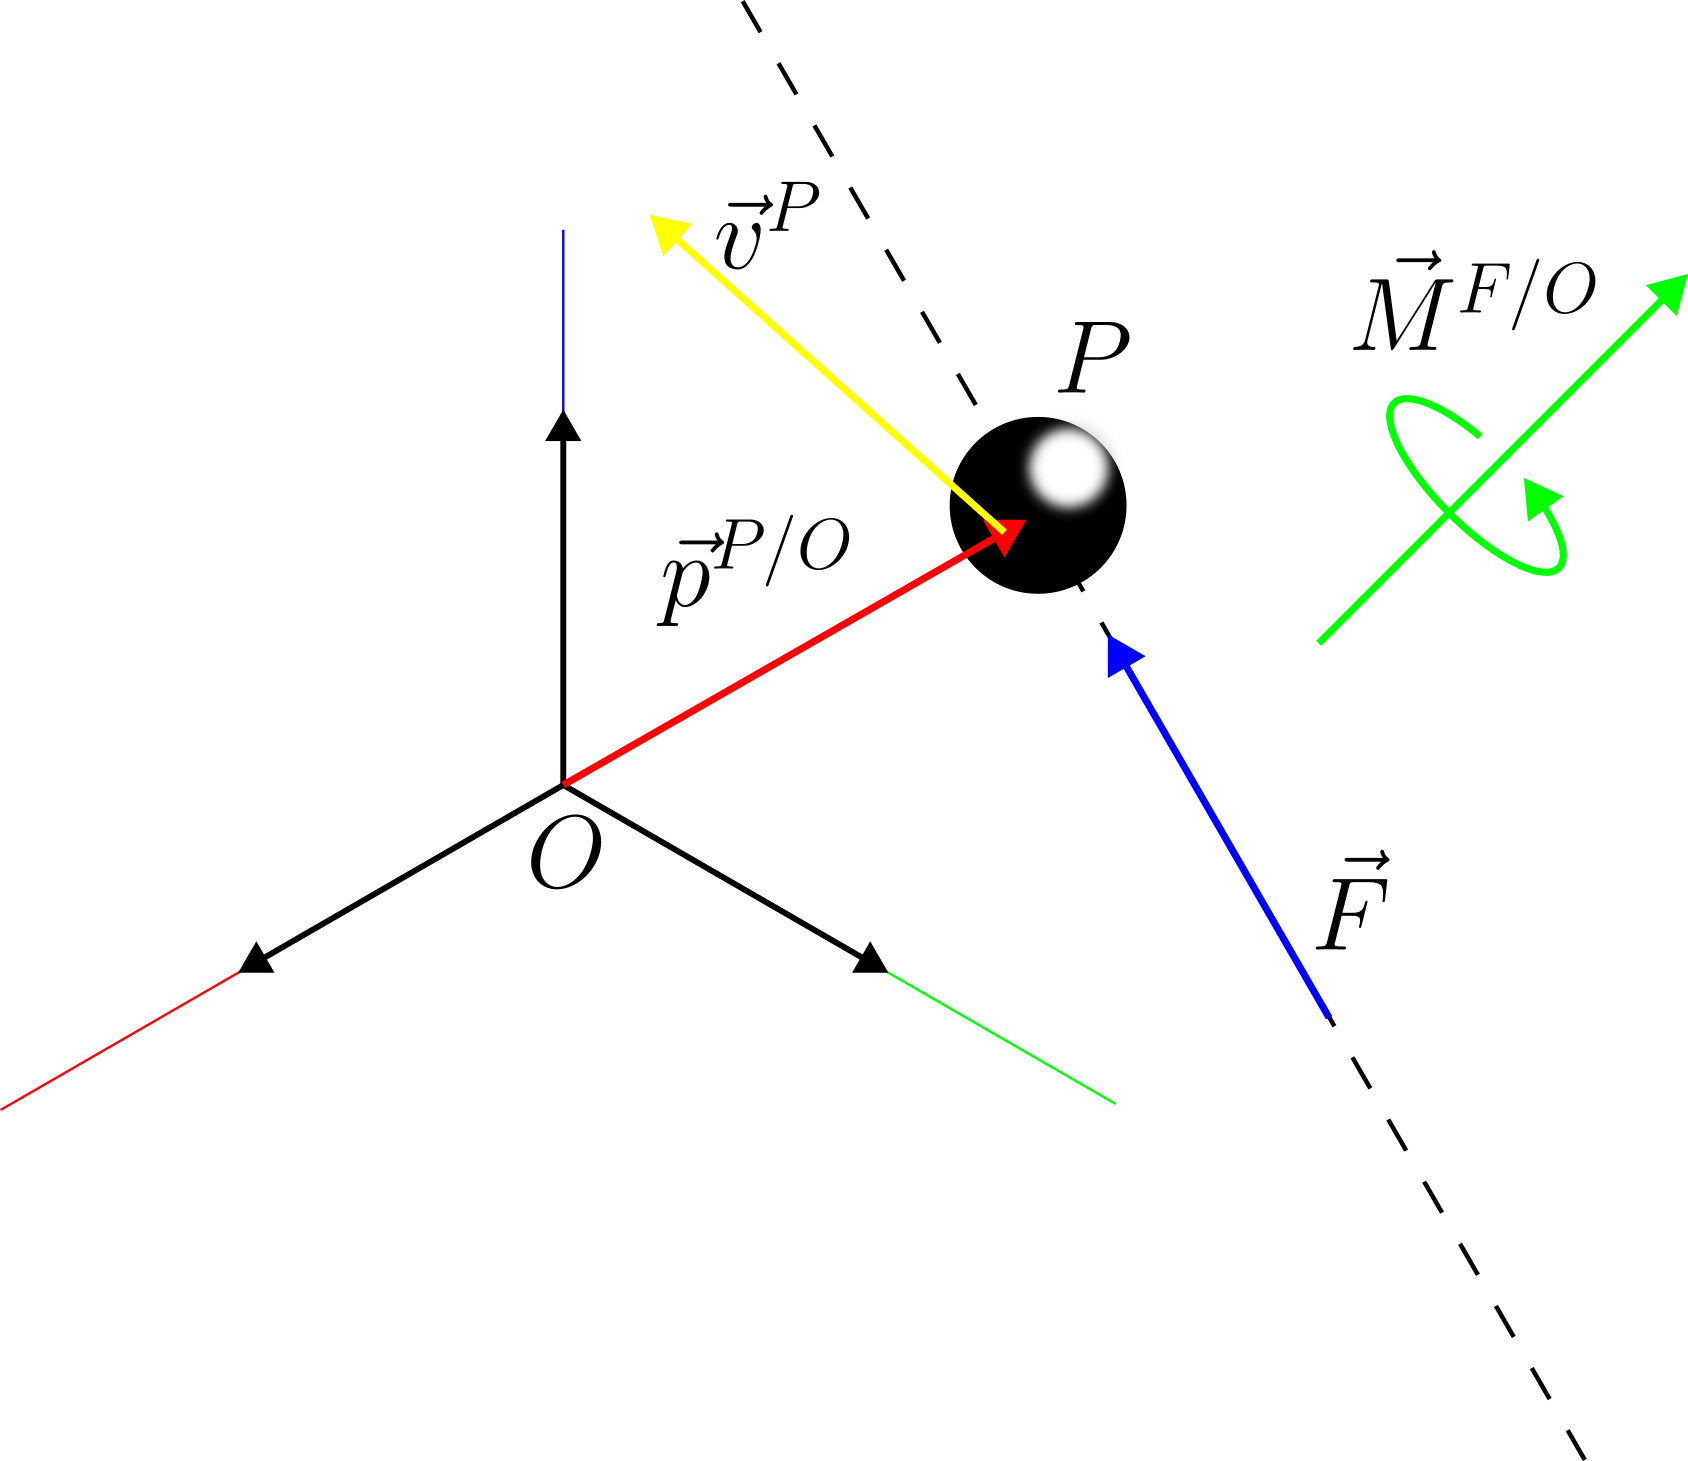

In [49]:
Image('partícula02.png',width=500)

### 4.4.2 Forças Gravitacionais


De acordo com a Lei da Gravitação Universal de Newton, as forças gravitacionais exercidas entre duas partículas de massas $m_1$ e $m_2$ são forças de atração, cujo módulo é dado por:

$ |\vec{f}_G| = K \dfrac{m_1 m_2}{R^2} $

Onde $K$ é a constante universal da gravitação, cujo valor, no Sistema Internacional de Unidades, é $K = 6,673 \times 10^{-11} m^3  kg^{-1}  s^{-2}$

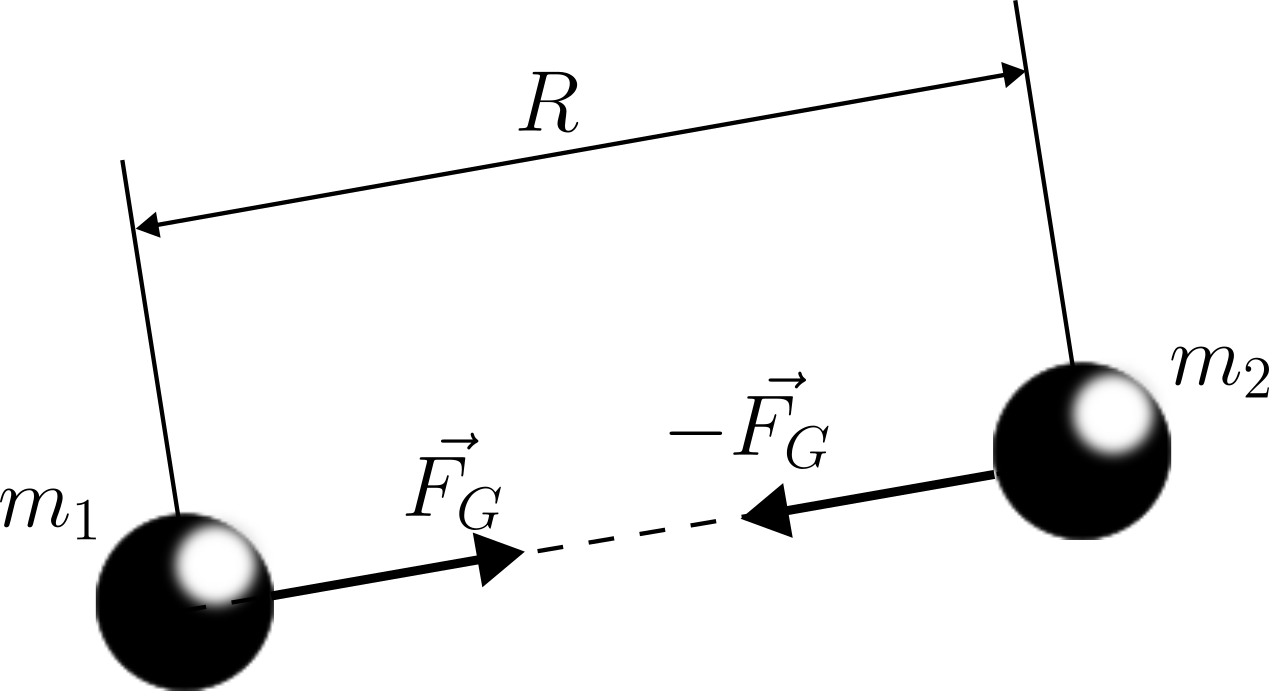

In [52]:
Image('Forças_1.png',width=500)

**Observação:** <br>
Em aplicações que requerem mais precisão na avaliação da aceleração da gravidade, fatores de correção devem ser introduzidos, considerando os efeitos da rotação da Terra e o achatamento do planeta nos polos. Assim, a Fórmula Internacional da Gravidade, que leva em conta estas correções, é:

$g(\phi) = 9,78049(1+0,0052884 sen^2 \phi - 0,0000059sen^2 2 \phi) [m/s^2] $

Onde $\phi$ designa o ângulo de latitude em radianos. 

### 4.4.3 Forças eletroestáticas

Segundo a lei de Coulomb, os módulos das forças eletroestáticas são dados pela expressão:

$|\vec{f}_E| = \dfrac{1}{4 \pi \varepsilon_0} \dfrac{q_1 q_2}{R^2} $

Onde $\varepsilon_0$ é a permissividade no vácuo, cujo valor no SI é: $\varepsilon_0 = 8,85419 \times 10^{-12} C^2 N^{-1} m^{-2}$.

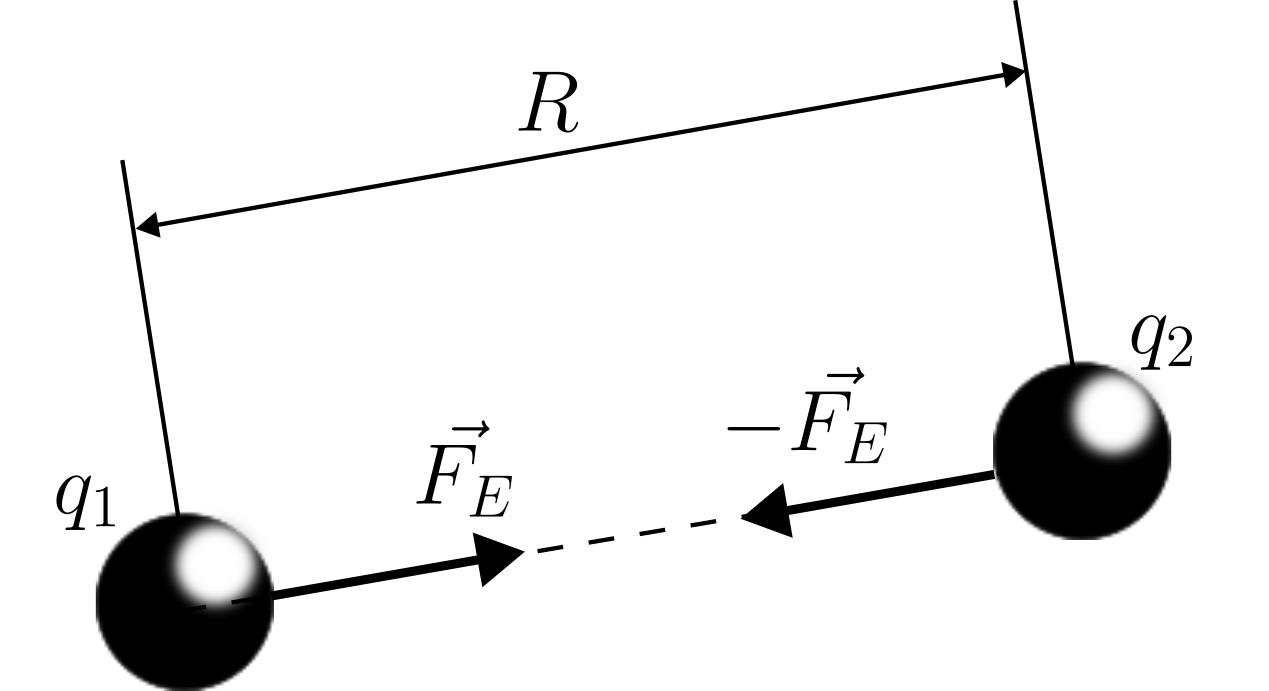

In [56]:
Image('Forças_2.png',width=500)

Em uma situação mais geral, uma partícula carregada eletricamente com carga $q$, posicionada em um campo elétrico $\vec{E}$, [N/C], fica sujeita a uma força eletrostática dada por:

$\vec{F}_E = q \vec{E} $

Sendo essa força tangente à linha de força do campo elétrico que passa pelo ponto instantaneamente ocupado pela partícula.

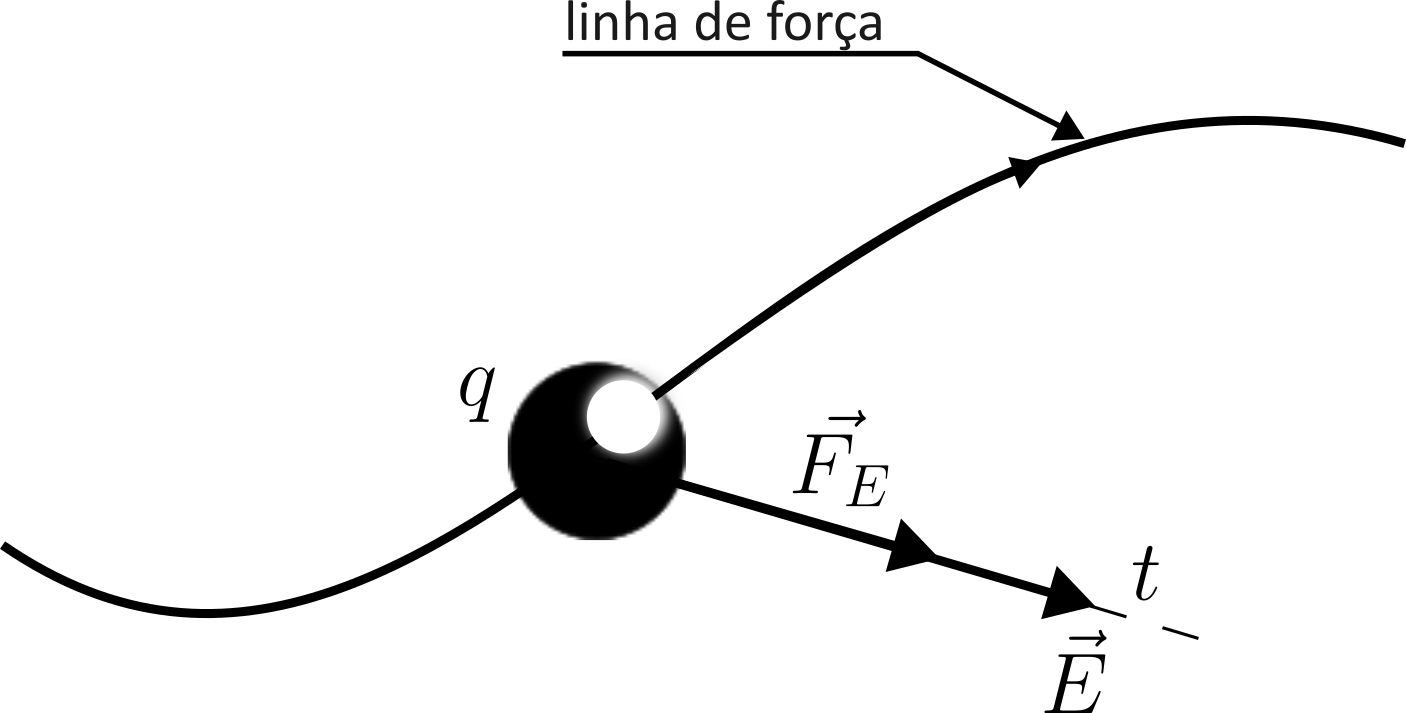

In [58]:
Image('Forças_3.png',width=500)

### 4.4.4 Forças Magnéticas

Uma partícula carregada eletricamente com carga $q$, movimentando-se com velocidade instantânea $\vec{v}$ em um campo magnético representado pelo vetor indução magnética $\vec{B}$, fica sujeita a uma força magnética dada por:

$ \vec{F}_B = q \vec{v} \times \vec{B} $

$\vec{B}$ tem direção tangente à linha de indução do campo magnético, ao passo que $\vec{v}$ é tangente à trajetória da partícula.

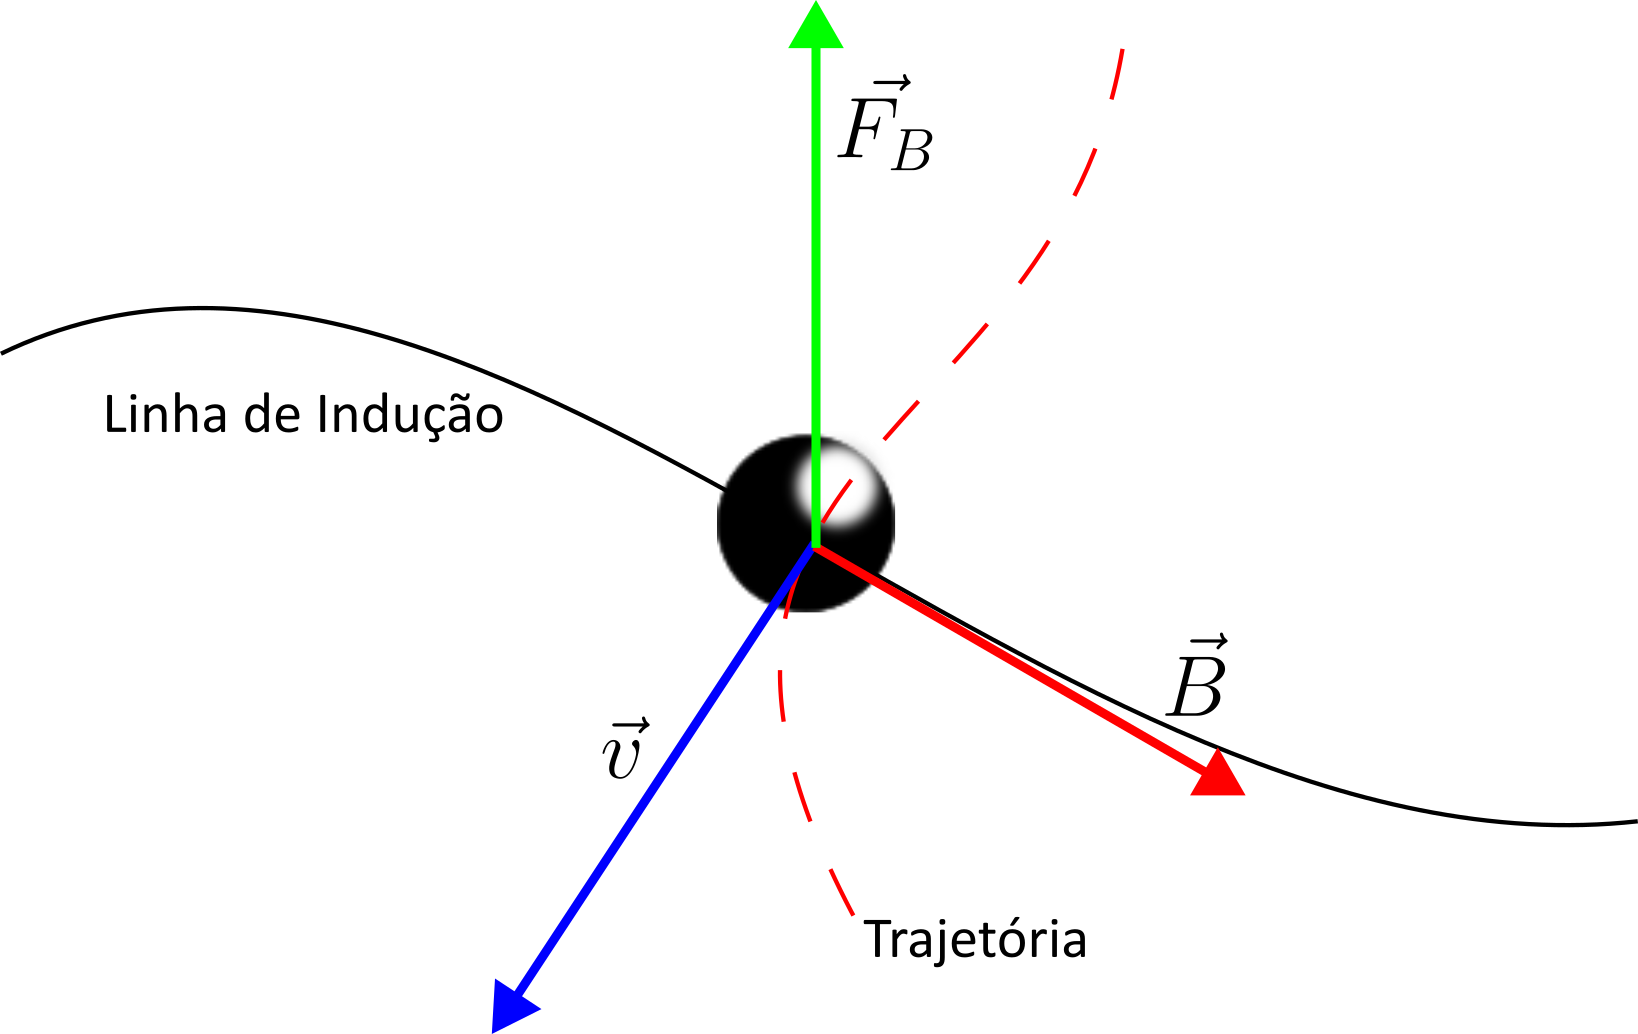

In [61]:
Image('Forças_4.png',width=500)

### 4.4.5 Forças de contato entre superfícies sólidas

As forças de contato entre duas superfícies sólidas estão entre as mais frequentes encontradas em problemas de Engenharia.

* Forças normais de contato
* Forças de atrito estático 
* Forças de atrito dinâmico



A frorça de atrito estático pode ser modelada como:



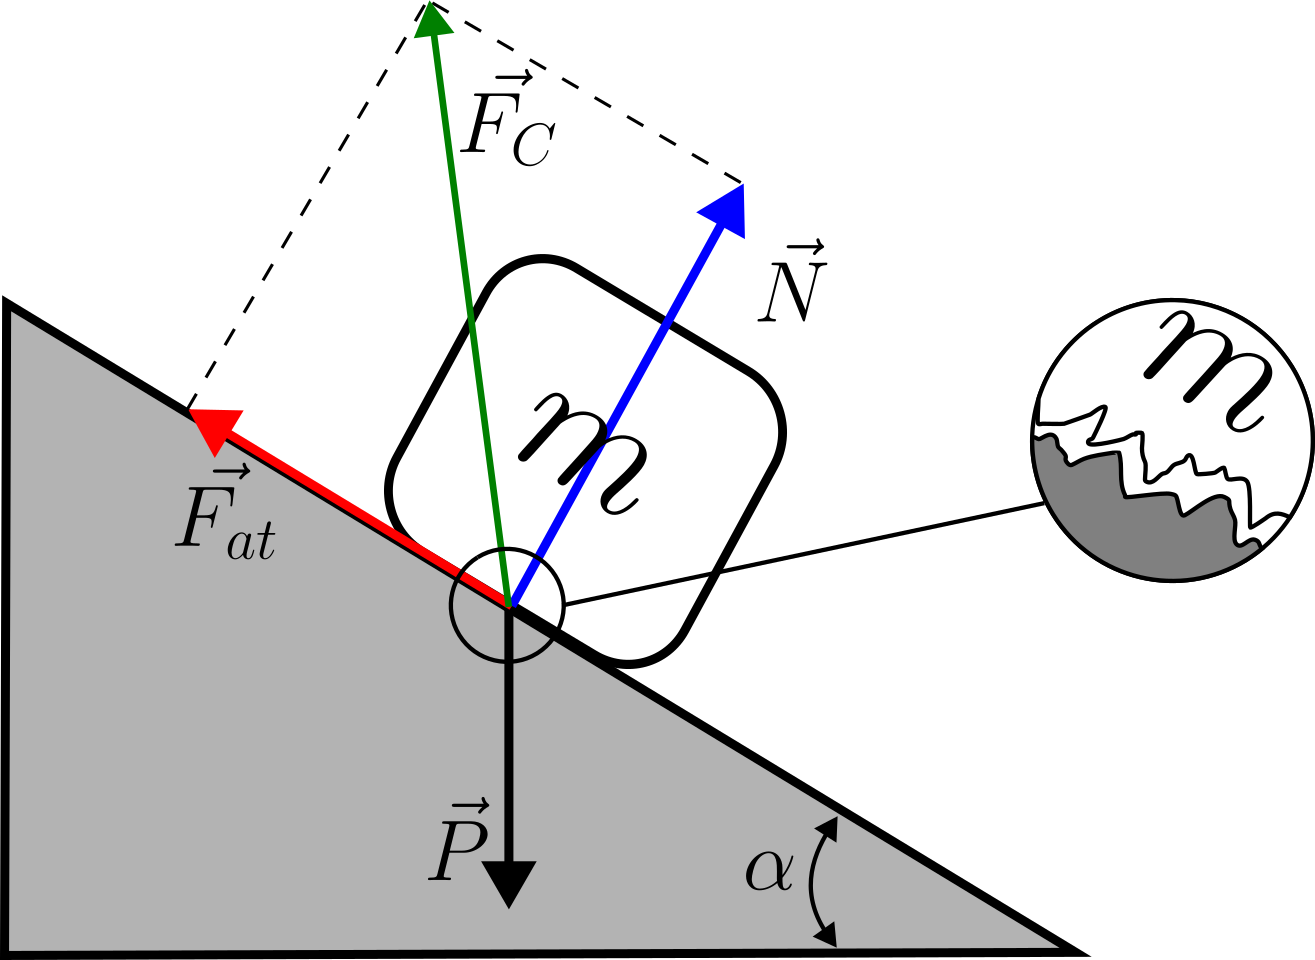

In [66]:
Image('Forças_5.png',width=500)

$|\vec{F_{at}}| = \mu_{est} N$

A força de atrito dinâmico pode ser modelada como:

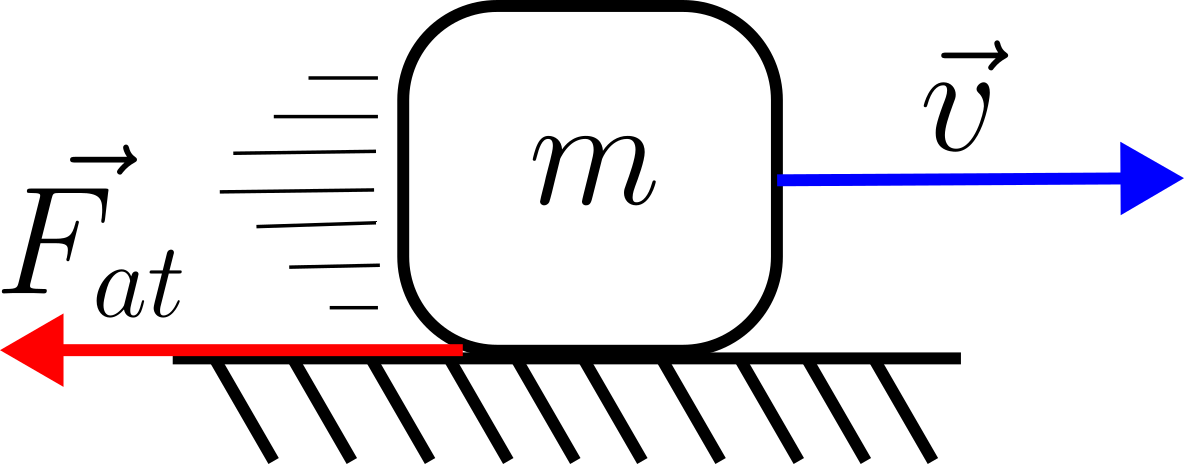

In [69]:
Image('Forças_6.png',width=500)

$ \vec{F_{at}} = \mu_{din} N \left( - \dfrac{\vec{v}}{|\vec{v}|}\right) $

**Exemplos de coeficientes de atrito estáticos e dinâmicos**

| Materiais em contato | $\mu_{est}$ | $\mu_{din}$ |
| --- | --- | --- |
| Aço-Aço | 0,74 | 0,57 | 
| Alumínio-Aço | 0,61 | 0,47 | 
| Cobre-Aço | 0,53 | 0,36 |
| Borracha-Concreto | 1,00 | 0,80 |
| Madeira-Madeira | 0,25 a 0,50 | 0,20 |
| Vidro-Vidro | 0,94 | 0,40 |
|Teflon-Teflon | 0,04 | 0,04 |

### 4.4.6 Forças exercidas por fluidos
* Forças hidroestáticas
* Forças hidrodinâmicas

#### 4.4.6.1 Forças hidroestáticas
De acordo com o *Princípio de Arquimedes* -> um corpo imerso em um fluido fica sujeito a uma força, denominada *empuxo*, que atua na direção vertical, com sentido para cima, sendo seu módulo igual ao peso do fluido deslocado pelo corpo. 

$|\vec{Q}| = \rho g V_i $

Onde $\rho$ é a densidade do fluido, $g$ é a gravidade e $V_i$ é o volume submerso

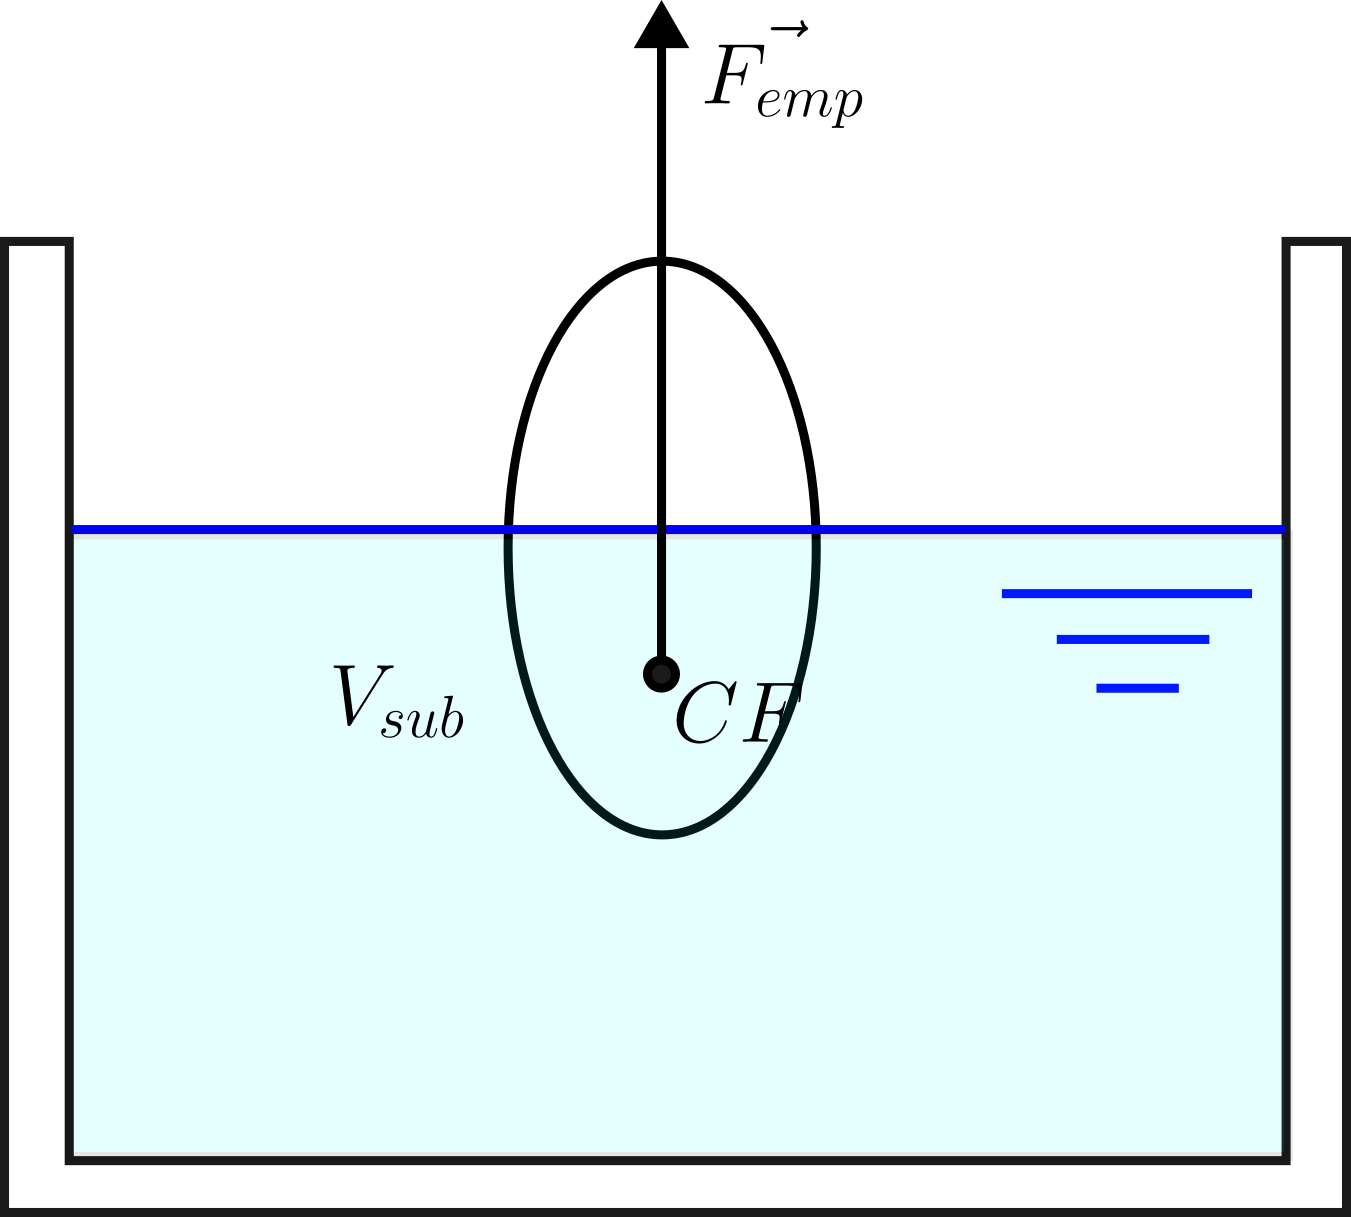

In [74]:
Image('Forças_7.png',width=400)

#### 4.4.6.2 Forças hidrodinâmicas
* Forças de arrasto (drag)

$|\vec{F_D}| = \dfrac{1}{2}c_D \rho v_{rel}^2 A_D $

* Forças de sustentação (lift)

$ |\vec{F_L}| = \dfrac{1}{2} c_L \rho v_{rel}^2 A_L $

Onde $c_D$ é o coeficiente de arrasto, $c_L$ é o coeficiente de sustentação, $A_D$ é a área projetada em um plano perpendicular à direção da velocidade do corpo em relação ao fluido, $A_L$ é a área projetada sobre um plano paralelo à direção da velocidade do corpo em relação ao fluido.

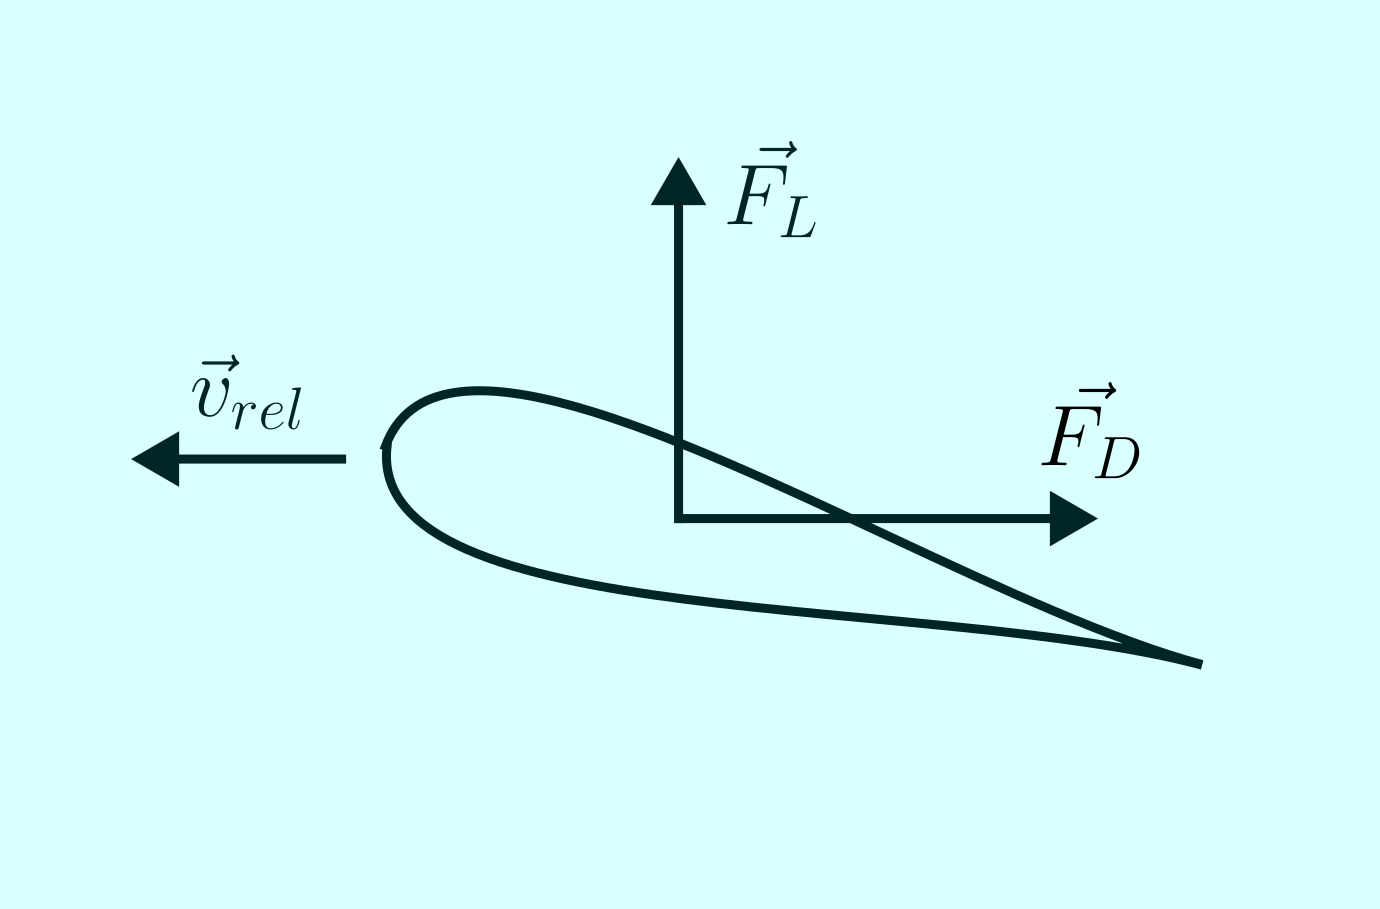

In [76]:
Image('Forças_8.png',width=500)

[Coeficentes de Arrasto](http://www-mdp.eng.cam.ac.uk/web/library/enginfo/aerothermal_dvd_only/aero/fprops/introvisc/node11.html)

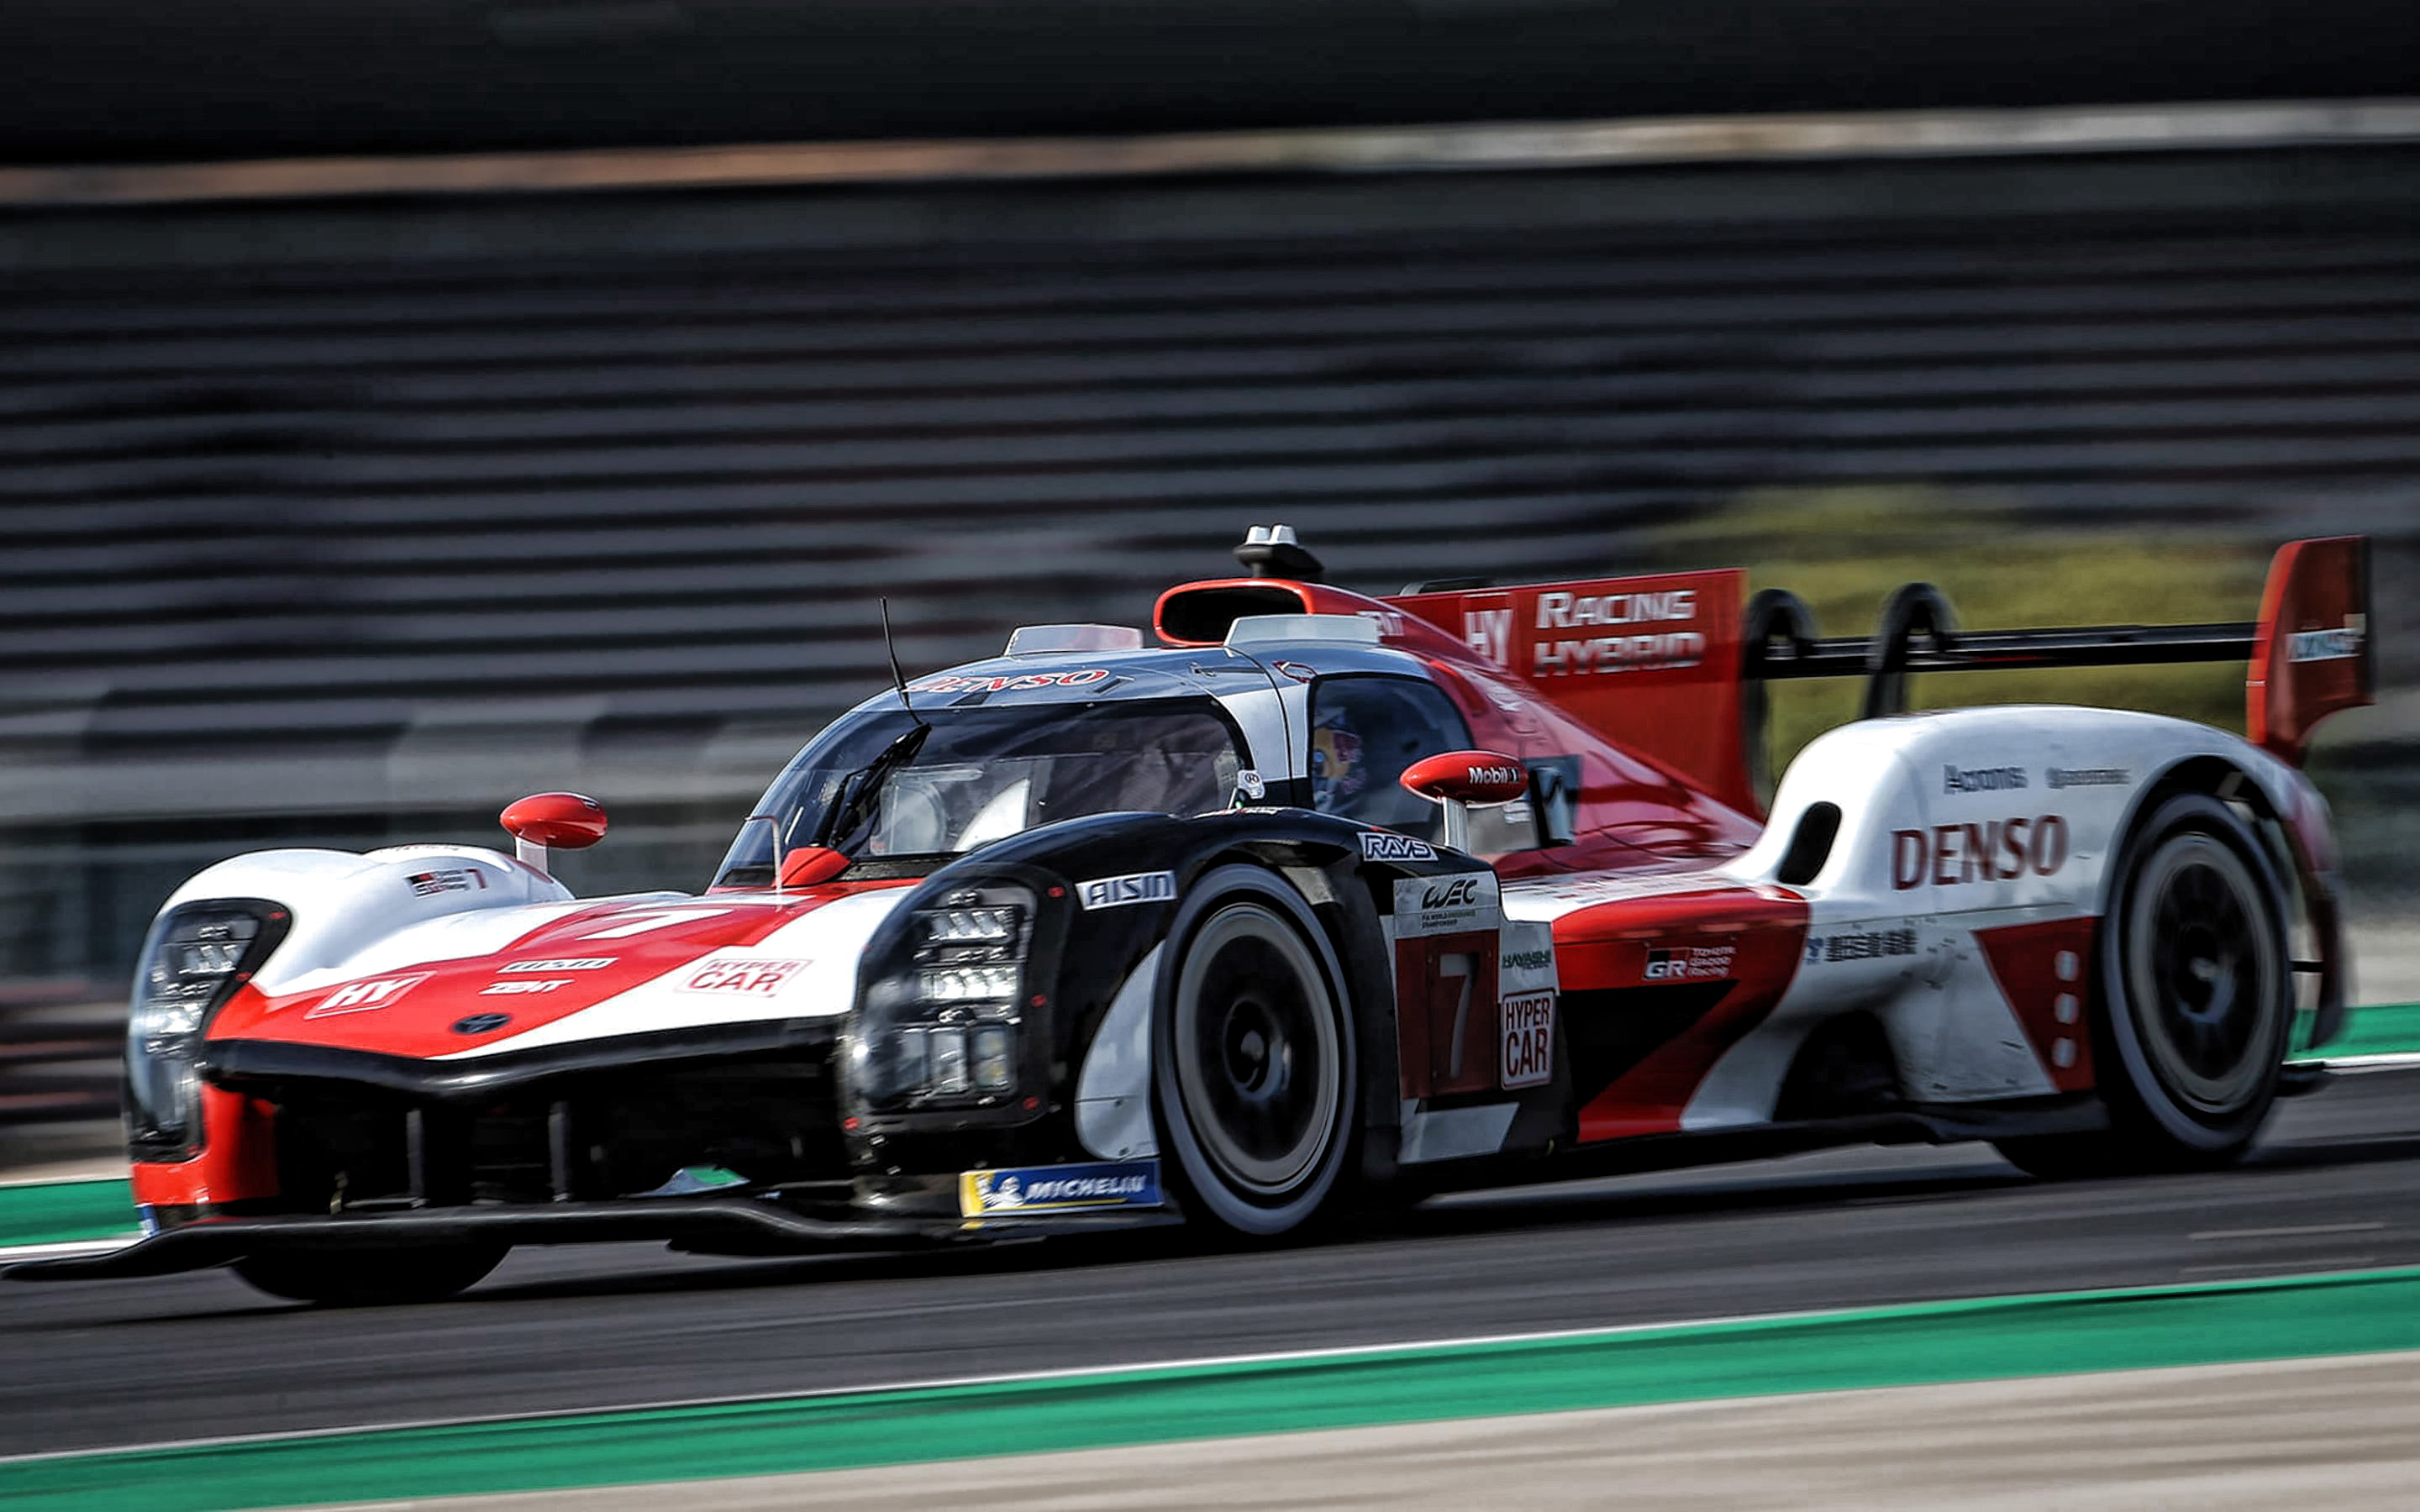

In [78]:
Image('Toyota_GR010.jpg',width=500)

### 4.4.7 Forças exercidas por cabos flexíveis e barras rígidas

Cabos flexíveis não resistem à forças cisalhantes e momentos fletores.

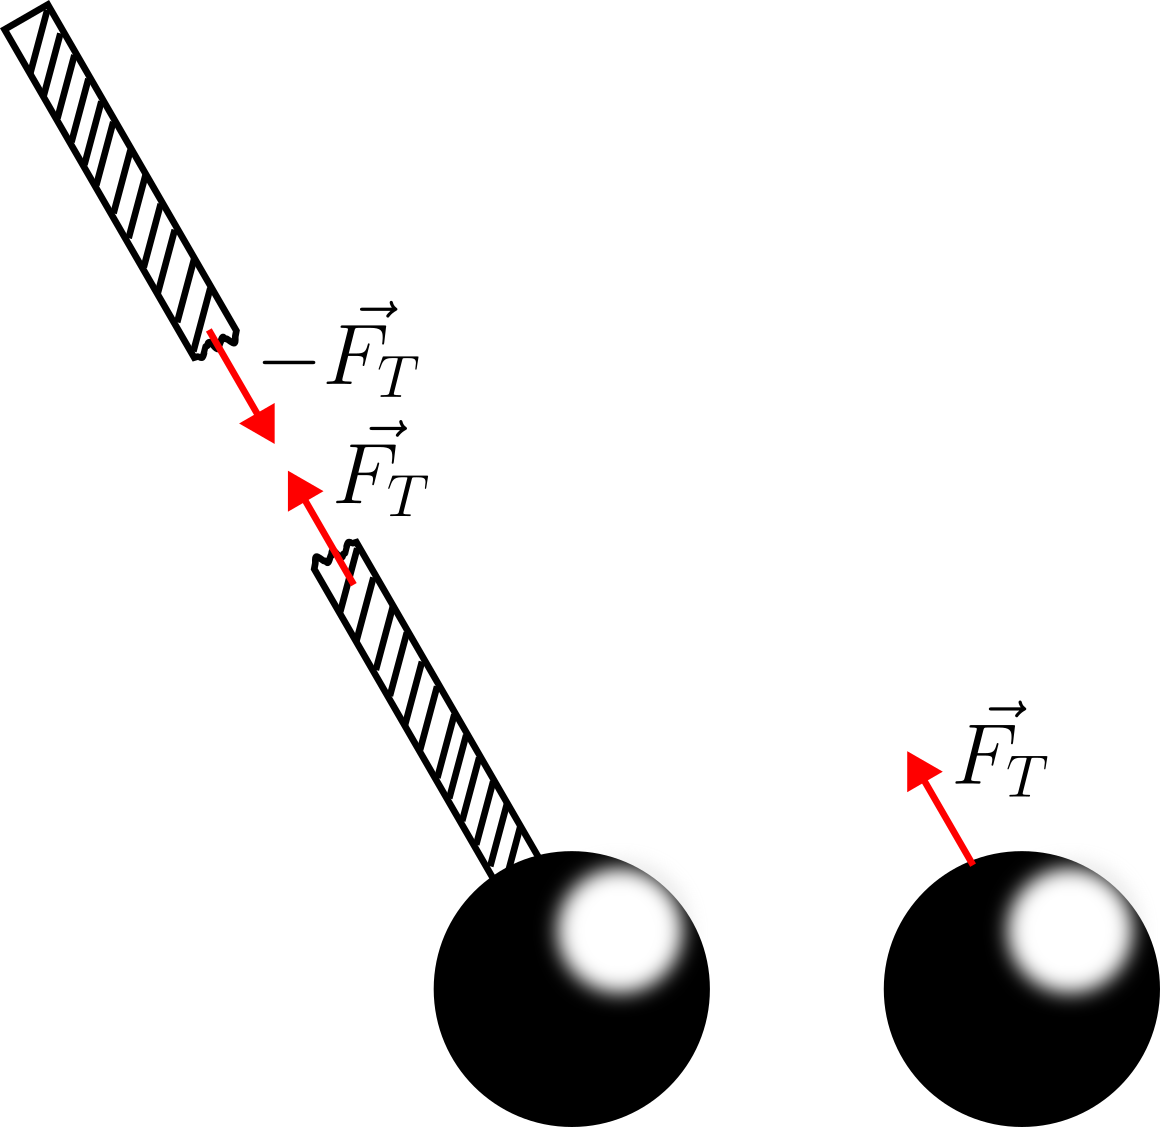

In [81]:
Image('Forças_11.png',width=400)

Barras rígidas conectadas em um único ponto não resitem à momentos fletores.

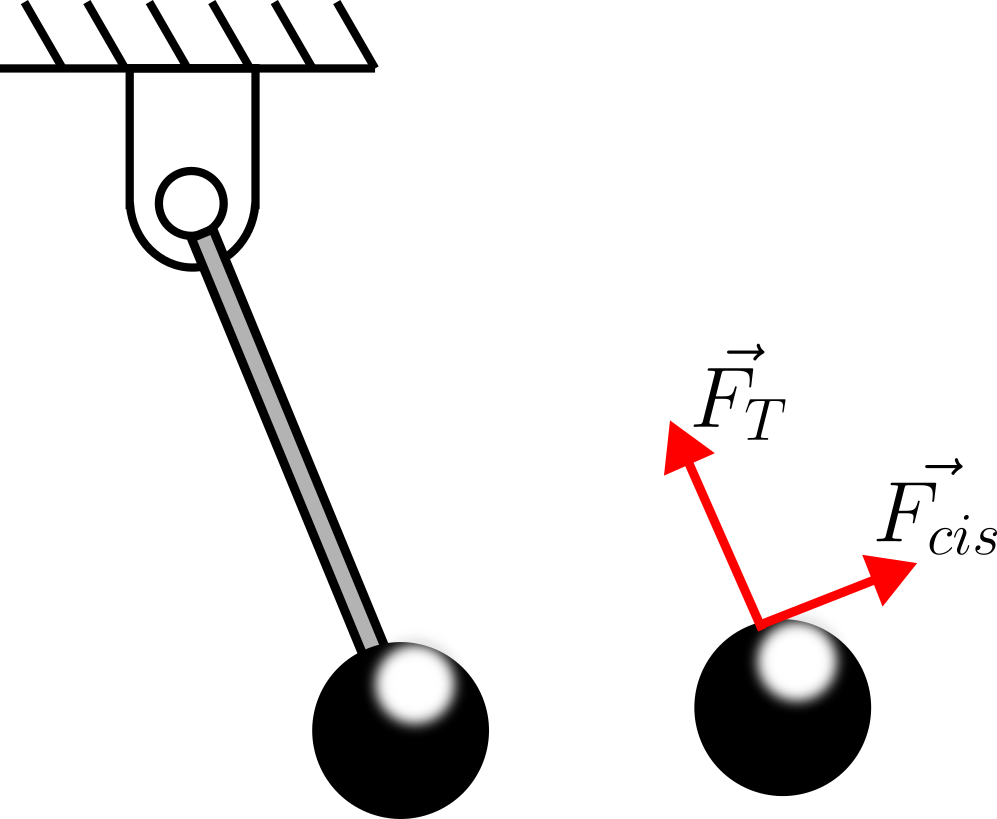

In [83]:
Image('Forças_12.png',width=400)

### 4.4.8 Forças exercidas por molas

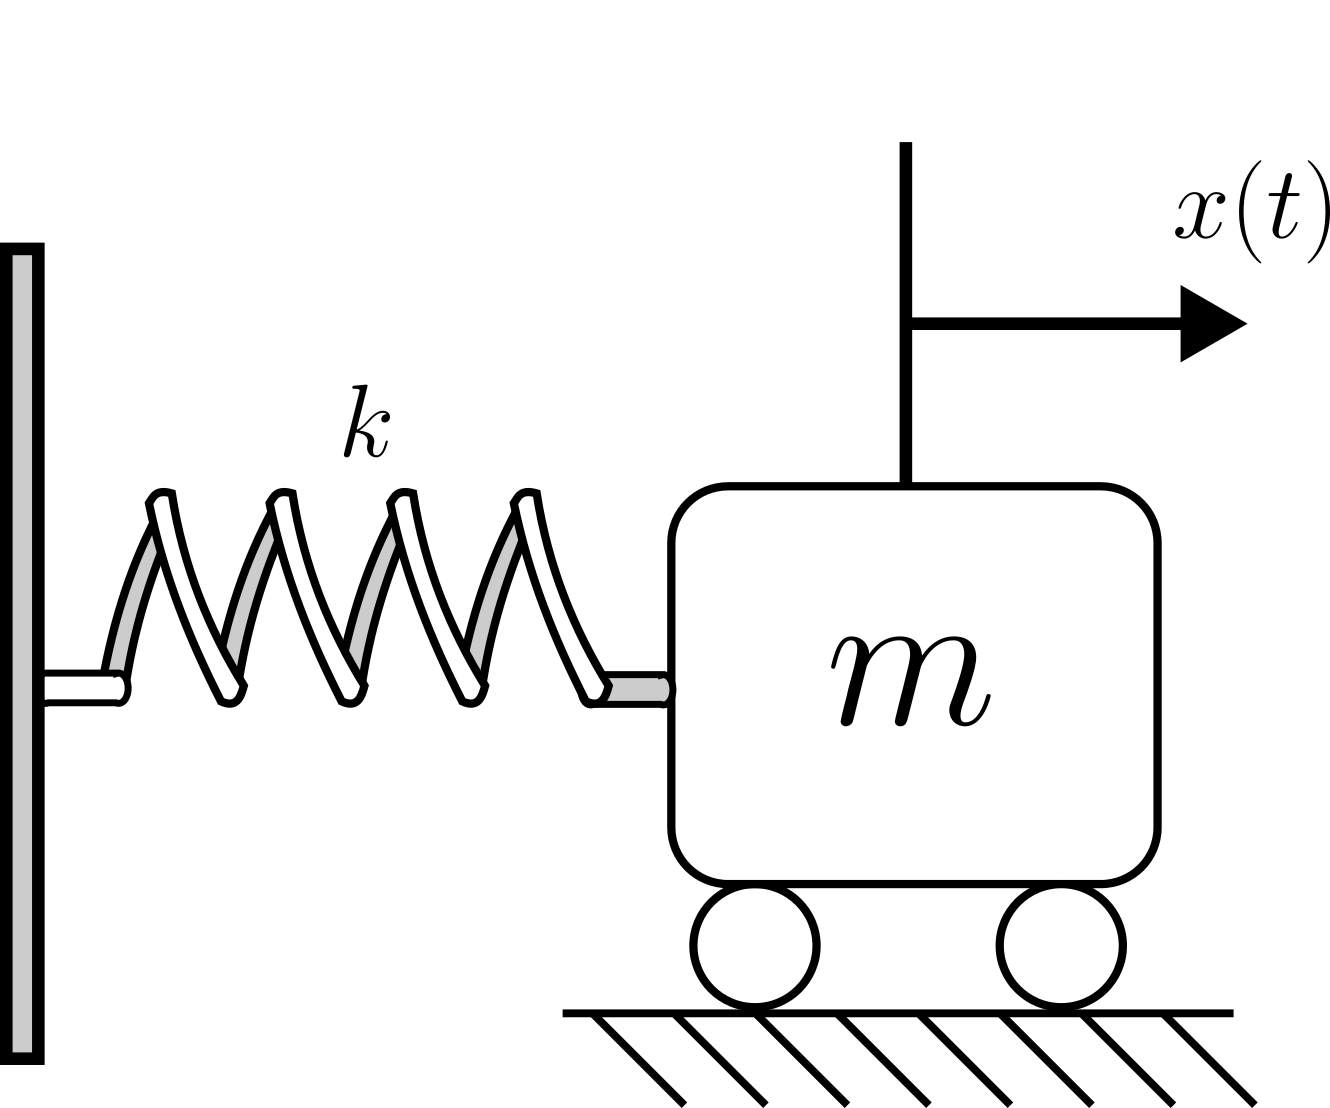

In [85]:
Image('Forças_9.png',width=400)

São forças de restituição elástica. Muitas vezes, a ridez de uma estrutura é representada na modelagem mecânica como uma mola. 

$\vec{F_{mola}} = -k \vec{x} $

Podemos ter molas não lineares:

$\vec{F_{mola}} = -kx^n $

Onde $n$ é uma constante adimensional. Os modelos mais comumente empregados para molas não lineares são aqueles em que $n=2$ ou $n=3$.

### 4.4.9 Forças exercidas por amortecedores viscosos

Amortecedores são dispositivos destinados a atenuar o movimento de componentes de sistemas mecânicos, proporcionando dissipação de energia. A denominação amortecedores viscosos tem origem no fato de que, usualmente, a dissipação é obtida promovendo a fricção entre as partículas de um fluido viscoso. Na prática, os amortecedores são formados por um cilindro preenchido com um fluido de alta viscosidade, como o óleo. <br>
De modo geral, modela-se a dissipação de energia de uma estrutura como um amortecedor viscoso. 
$$\vec{F}_a = -c\vec{v}$$
Onde $c$ é denominado coeficiente de amortecimento viscoso [Ns/m]

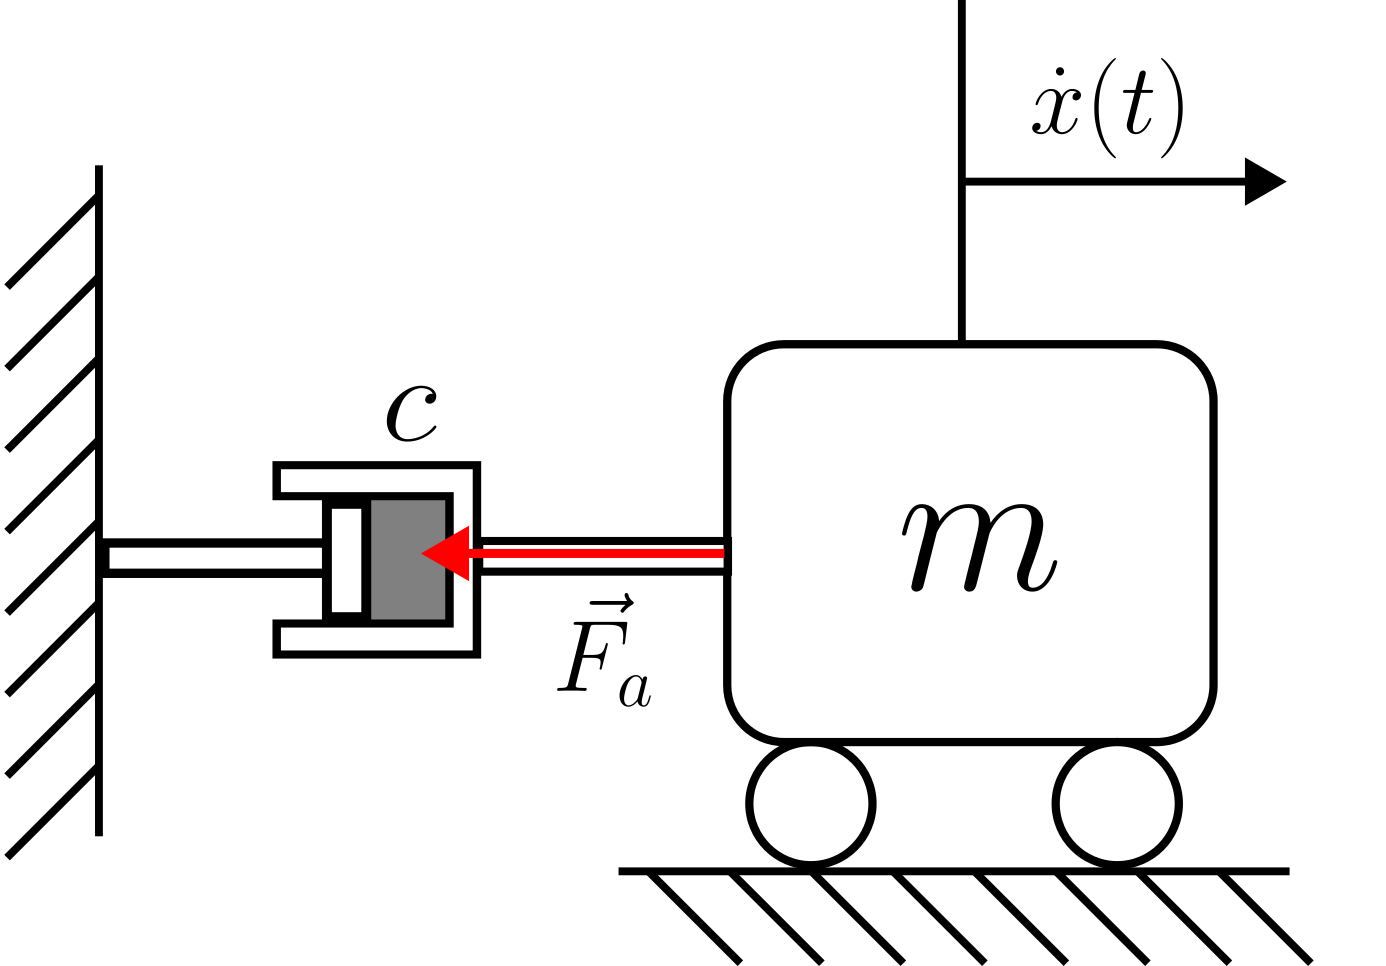

In [90]:
Image('Forças_10.png',width=400)

Podemos ter também amortecedores não lineares:
$$F_a = c v^{n}$$

## 4.5 Diagramas de Corpos Livre

Consiste na representação isolada de cada componente (corpo, partícula, elemento infinitesimal, ou um conjunto de corpos e partículas) de um sistema mecânico, e onde se representam todas as forças e momentos que sobre ele atuam. O Diagrama de Corpo Livre (DCL) é fundamental na resolução da dinâmica de sistemas mecânicos utilizando o Método de Newton.


## 4.6 Equações de Movimento

A elaboração das **Equações de Movimento** consiste na união da análise cinemática e cinética do objeto de estudo. Através do DCL e da Segunda Lei de Newton, obteremos uma equação vetorial que descreverá o movimento do sistema analisado. Para um melhor entendimento e análise da dinâmica, essa equação vetorial é decomposta em equações escales através de sua projeção em uma base vetorial escolhida. 

$ \sum_{i=1}^{n} \vec{F}_i = m \ddot{\vec{p}}$

$ \sum_{i=1}^{n} \vec{F}_i \cdot \hat{n}_x = m \ddot{\vec{p}} \cdot\hat{n}_x \rightarrow F_x = m \ddot{x}$

$ \sum_{i=1}^{n} \vec{F}_i \cdot \hat{n}_y = m \ddot{\vec{p}} \cdot\hat{n}_y \rightarrow F_y = m \ddot{y}$

$ \sum_{i=1}^{n} \vec{F}_i \cdot \hat{n}_z = m \ddot{\vec{p}} \cdot\hat{n}_z \rightarrow F_z = m \ddot{z}$

### Exemplo 3

No instante $t=0$ uma partícula de massa $m$ é liberada a partir do repouso de uma altura $h$ e cai verticalmente. Admitindo que a força de resistência do ar seja proporcional à velocidade instantânea, de acordo com a relação $f_r = -cv$, pede-se: **a)** desenvolver as funções descrevendo a posição, a velocidade e a aceleração da partícula em função do tempo transcorrido após sua liberação; **b)** traçar as curvas representando as funções obtidas no item a), adotando $m=1.0kg$, $h=100.0 m$, $c=0.8Ns/m$.<br>
Solução:

$-cv - mg = m \dfrac{dv}{dt}$

In [98]:
m,g,h = symbols('m g h')
c = symbols('c',nonzero=True,positive=True)
v = me.dynamicsymbols('v')
t = me.dynamicsymbols._t

Reorganizando a equação de movimento:

$m \dfrac{dv}{dt} +cv + mg = 0$

In [100]:
EqMov = Eq(m*v.diff(t) + c*v + m*g,0)
EqMov

Eq(c*v(t) + g*m + m*Derivative(v(t), t), 0)

In [101]:
v_sol = dsolve(EqMov.lhs,v)
v_sol

Eq(v(t), C1*exp(-c*t/m) - g*m/c)

In [102]:
v_sol.subs(t,0)

Eq(v(0), C1 - g*m/c)

In [103]:
C1 = solve(v_sol.subs(t,0).rhs,'C1')[0]
C1

g*m/c

In [104]:
v_sol = v_sol.subs('C1',C1).simplify()
v_sol

Eq(v(t), -g*m/c + g*m*exp(-c*t/m)/c)

In [105]:
a = v_sol.rhs.diff(t)
a

-g*exp(-c*t/m)

In [106]:
x = integrate(v_sol.rhs,t)
x

-g*m*t/c - g*m**2*exp(-c*t/m)/c**2

In [107]:
x += h
x

h - g*m*t/c - g*m**2*exp(-c*t/m)/c**2

In [108]:
valores = {m:1,h:100,c:0.8,g:9.8}

In [109]:
v_num = v_sol.subs(valores).rhs
v_num

-12.25 + 12.25*exp(-0.8*t)

Vamos vericar a velocidade máxima aplicando um limite fazendo o tempo tender a infinito

In [111]:
limit(v_num,t,oo)

-49/4

In [112]:
x_num = x.subs(valores)
x_num

-12.25*t + 100 - 15.3125*exp(-0.8*t)

In [113]:
a_num = a.subs(valores)
a_num

-9.8*exp(-0.8*t)

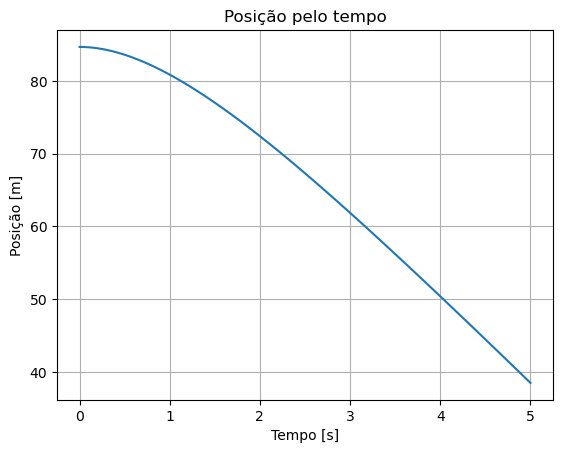

In [114]:
lam_x = lambdify(t,x_num,modules = ['numpy'])
t_vals = linspace(0,5,100)
x_vals = lam_x(t_vals)
plt.figure()
plt.plot(t_vals,x_vals)
plt.xlabel('Tempo [s]')
plt.ylabel('Posição [m]')
plt.title('Posição pelo tempo')
plt.grid(True)

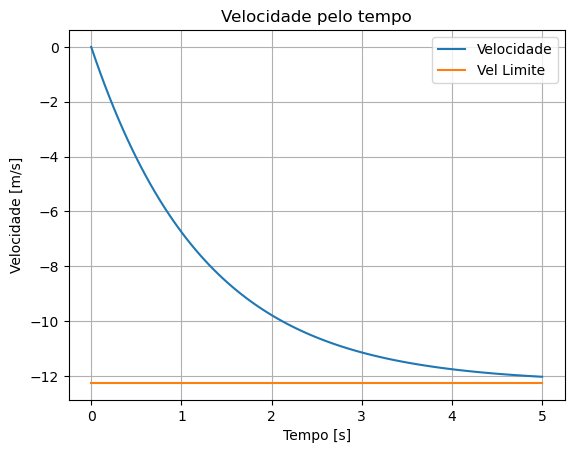

In [115]:
lam_v = lambdify(t,v_num,modules = ['numpy'])
v_vals = lam_v(t_vals)
plt.figure()
plt.plot(t_vals,v_vals)
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [m/s]')
plt.title('Velocidade pelo tempo')
plt.grid(True)
plt.plot(t_vals,linspace(-12.25,-12.25,100))
plt.legend(['Velocidade','Vel Limite'])
plt.show()

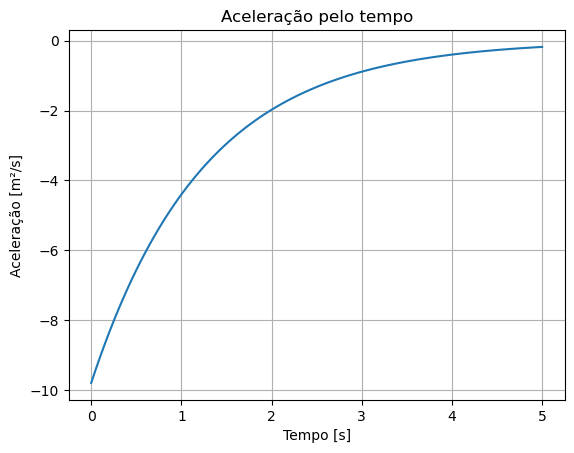

In [116]:
lam_a = lambdify(t,a_num,modules = ['numpy'])
a_vals = lam_a(t_vals)
plt.figure()
plt.plot(t_vals,a_vals)
plt.xlabel('Tempo [s]')
plt.ylabel('Aceleração [m²/s]')
plt.title('Aceleração pelo tempo')
plt.grid(True)

### Exemplo 4

Obtenha as equações de movimento da partícula $P$, conforme mostrado na figura a seguir. Para a simulação considere os seguintes parâmetros: <br>
Ângulo inicial: $\theta = \dfrac{\pi}{3} rad$ <br>
Velocidade angular inicial: $\dot{\theta} = 0 rad/s$ <br>
Velocidade angular do tubo: $\omega = 10 rad/s$ <br>
Raio de curvatura do tubo: $r = 0.5m$ <br>
Gravidade: $g = 9.8 m/s^2$<br>
Massa da partícula: $m = 1kg$ 

In [119]:
from IPython.display import Video
Video('dinamica_da_particula_ex11.m4v')

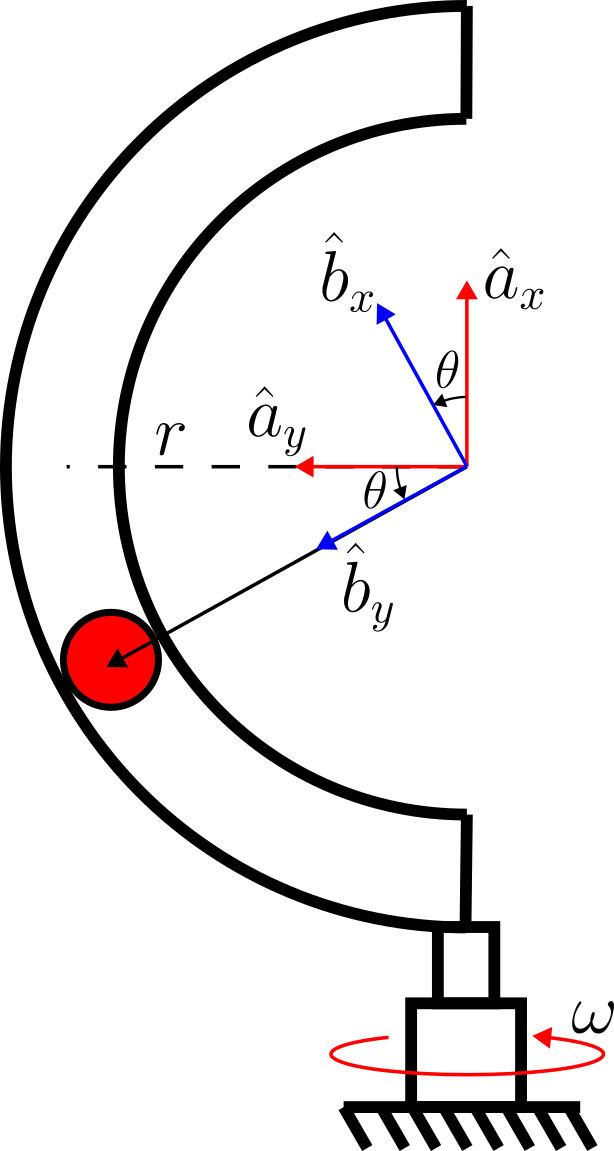

In [120]:
Image('cinetica01.png',width=300)

**Cinemática**

In [122]:
omega,r = symbols('omega r')
theta = me.dynamicsymbols('theta')
t = me.dynamicsymbols._t

In [123]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [124]:
A.orient(N,'Axis',[omega*t,N.x])
B.orient(A,'Axis',[theta,A.z])

In [125]:
B.ang_vel_in(N)

omega*N.x + Derivative(theta(t), t)*A.z

In [126]:
B.ang_acc_in(N)

- omega*Derivative(theta(t), t)*A.y + Derivative(theta(t), (t, 2))*A.z

In [127]:
O = me.Point('O')
O.set_vel(N,0)

In [128]:
P = me.Point('P')
pPO = r*B.y
P.set_pos(O,pPO)
P.set_vel(N,pPO.dt(N))

In [129]:
P.vel(N)

- r*Derivative(theta(t), t)*B.x + omega*r*cos(theta(t))*B.z

In [130]:
P.acc(N)

(-omega**2*r*sin(theta(t))*cos(theta(t)) - r*Derivative(theta(t), (t, 2)))*B.x + (-omega**2*r*cos(theta(t))**2 - r*Derivative(theta(t), t)**2)*B.y - 2*omega*r*sin(theta(t))*Derivative(theta(t), t)*B.z

**Cinética**

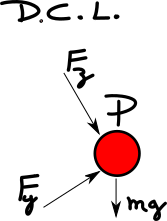

In [132]:
Image('cinetica02.png',width=300)

In [133]:
Fy,Fz,g,m = symbols('F_y F_z g m')

In [134]:
ParP = me.Particle('ParP',P,m)

In [135]:
G = ParP.linear_momentum(N)
G

- m*r*Derivative(theta(t), t)*B.x + m*omega*r*cos(theta(t))*B.z

In [136]:
Gponto = G.dt(N)
Gponto

(-m*omega**2*r*sin(theta(t))*cos(theta(t)) - m*r*Derivative(theta(t), (t, 2)))*B.x + (-m*omega**2*r*cos(theta(t))**2 - m*r*Derivative(theta(t), t)**2)*B.y - 2*m*omega*r*sin(theta(t))*Derivative(theta(t), t)*B.z

In [137]:
R = Fy*B.y + Fz*B.z - m*g*N.x
R

- g*m*N.x + F_y*B.y + F_z*B.z

Princípio de D'Alembert (equilíbrio dinâmico):

$\vec{R} + \left(-{}^{N}\dot{\vec{G}} {}^{P} \right) = \vec{0}$

Onde $-{}^{N}\dot{\vec{G}} {}^{P}$ é a força de inércia

In [139]:
Eq_mov = R - Gponto
Eq_mov

- g*m*N.x + (m*omega**2*r*sin(theta(t))*cos(theta(t)) + m*r*Derivative(theta(t), (t, 2)))*B.x + (F_y + m*omega**2*r*cos(theta(t))**2 + m*r*Derivative(theta(t), t)**2)*B.y + (F_z + 2*m*omega*r*sin(theta(t))*Derivative(theta(t), t))*B.z

In [140]:
Eq_mov_bx = Eq_mov.dot(B.x)
Eq_mov_bx

-g*m*cos(theta(t)) + m*omega**2*r*sin(theta(t))*cos(theta(t)) + m*r*Derivative(theta(t), (t, 2))

In [141]:
Eq_mov_by = Eq_mov.dot(B.y)
Eq_mov_by

F_y + g*m*sin(theta(t)) + m*omega**2*r*cos(theta(t))**2 + m*r*Derivative(theta(t), t)**2

In [142]:
Eq_mov_bz = Eq_mov.dot(B.z)
Eq_mov_bz

F_z + 2*m*omega*r*sin(theta(t))*Derivative(theta(t), t)

In [143]:
Fy_sol = solve(Eq_mov_by,Fy)
Fy_sol[0]

-m*(g*sin(theta(t)) + omega**2*r*cos(theta(t))**2 + r*Derivative(theta(t), t)**2)

In [144]:
Fz_sol = solve(Eq_mov_bz,Fz)
Fz_sol[0]

-2*m*omega*r*sin(theta(t))*Derivative(theta(t), t)

In [145]:
theta_pp = solve(Eq_mov_bx,theta.diff(t,2))[0]
theta_pp

(g - omega**2*r*sin(theta(t)))*cos(theta(t))/r

**Simulação**

In [147]:
parametros = {omega:10,r:0.5,m:1,g:9.8}

In [148]:
theta_pp_num = theta_pp.subs(parametros)
theta_pp_num

2.0*(9.8 - 50.0*sin(theta(t)))*cos(theta(t))

In [149]:
def Sistema(X,tn):
    th = X[0]
    th_p = X[1]
    th_pp = theta_pp_num.subs({theta:th,theta.diff(t):th_p})
    Xp = [th_p,th_pp]
    return Xp

In [150]:
from scipy.integrate import odeint

In [151]:
tn = linspace(0,10,1000)
X0 = [pi/3,0] #condições iniciais [theta, theta ponto]

In [152]:
X = odeint(Sistema,X0,tn)

**Visualização de Resultados**

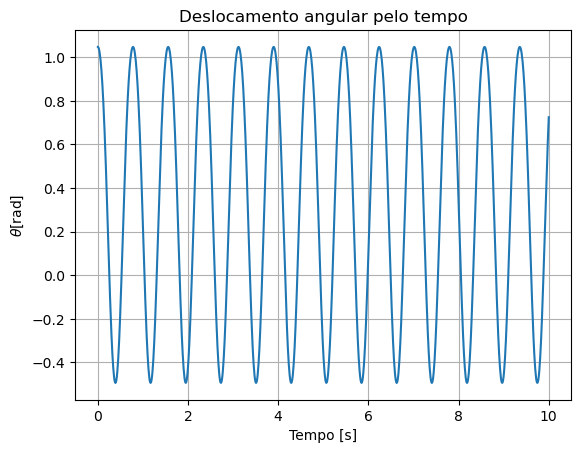

In [154]:
plt.figure()
plt.plot(tn,X[:,0])
plt.xlabel('Tempo [s]')
plt.ylabel(r'$\theta$[rad]')
plt.title('Deslocamento angular pelo tempo')
plt.grid(True)

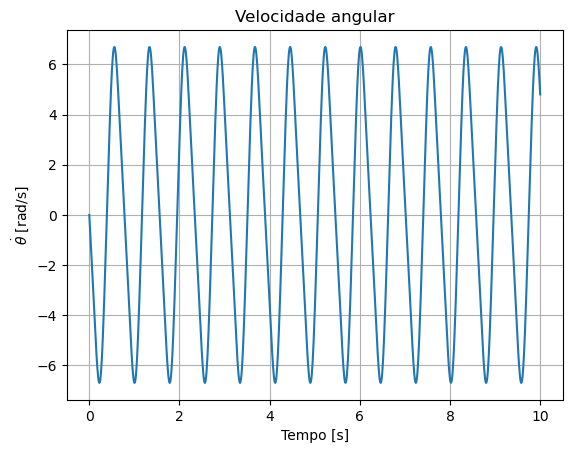

In [155]:
plt.figure()
plt.plot(tn,X[:,1])
plt.xlabel('Tempo [s]')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
plt.title('Velocidade angular')
plt.grid(True)

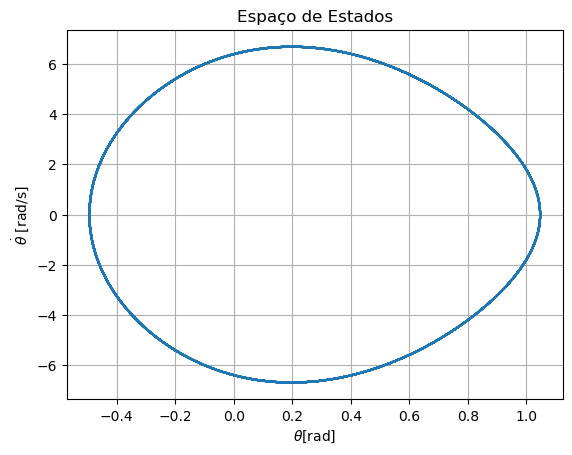

In [156]:
plt.figure()
plt.plot(X[:,0],X[:,1])
plt.xlabel(r'$\theta$[rad]')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
plt.title('Espaço de Estados')
plt.grid(True)

In [157]:
lista_thpp = []
for i in range(0,len(tn)):
    lista_thpp.append(theta_pp_num.subs(theta,X[i,0]))

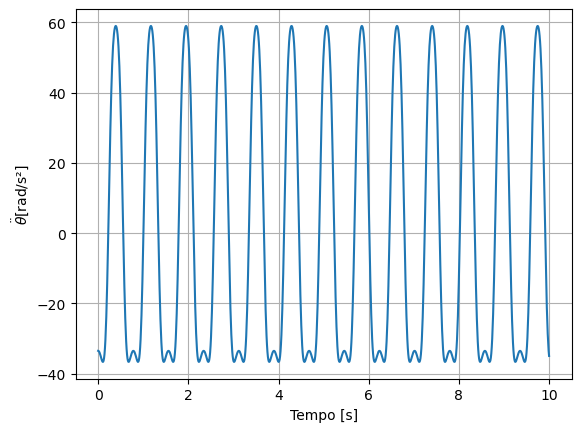

In [158]:
plt.figure()
plt.plot(tn,lista_thpp)
plt.xlabel('Tempo [s]')
plt.ylabel(r'$\ddot{\theta}$[rad/s²]')
plt.grid(True)
plt.show()

In [159]:
P.pos_from(O).express(N)

- r*sin(theta(t))*N.x + r*cos(omega*t)*cos(theta(t))*N.y + r*sin(omega*t)*cos(theta(t))*N.z

In [160]:
Px = P.pos_from(O).dot(N.x)
Px

-r*sin(theta(t))

In [161]:
Px = Px.subs(parametros)
Px

-0.5*sin(theta(t))

In [162]:
Py = (P.pos_from(O).dot(N.y)).subs(parametros)
Pz = (P.pos_from(O).dot(N.z)).subs(parametros)

In [163]:
Pxlista = []
Pylista = []
Pzlista = []
for i in range(0,len(tn)):
    dic={theta:X[i,0],t:tn[i]}
    Pxlista.append(Px.subs(dic))
    Pylista.append(Py.subs(dic))
    Pzlista.append(Pz.subs(dic))

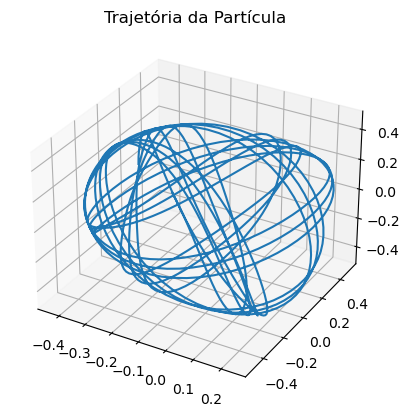

In [164]:
plt.figure().add_subplot(projection='3d')
plt.plot(Pxlista,Pylista,Pzlista)
plt.title('Trajetória da Partícula')
plt.show()

Simulando uma situação um pouco mais real...

In [166]:
omega,r = symbols('omega r')
theta = me.dynamicsymbols('theta')
t = me.dynamicsymbols._t
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')
A.orient(N,'Axis',[omega*t,N.x])
B.orient(A,'Axis',[theta,A.z])
O = me.Point('O')
O.set_vel(N,0)
P = me.Point('P')
pPO = r*B.y
P.set_pos(O,pPO)
P.set_vel(N,pPO.dt(N))
Fy,Fz,g,m = symbols('F_y F_z g m')
c = symbols('c') # Dissipação de Energia!!
ParP = me.Particle('ParP',P,m)
G = ParP.linear_momentum(N)
Gponto = G.dt(N)
R = Fy*B.y + Fz*B.z - m*g*N.x - c*P.vel(N).dot(B.x)*B.x
Eq_mov = R - Gponto
Eq_mov_bx = Eq_mov.dot(B.x)
Eq_mov_by = Eq_mov.dot(B.y)
Eq_mov_bz = Eq_mov.dot(B.z)
Fy_sol = solve(Eq_mov_by,Fy)
Fz_sol = solve(Eq_mov_bz,Fz)
theta_pp = solve(Eq_mov_bx,theta.diff(t,2))[0]
tn = linspace(0,10,1000)
X0 = [1,0] #condições iniciais [theta, theta ponto]
parametros = {omega:10,r:0.5,m:1,g:9.8,c:15}
theta_pp_num = theta_pp.subs(parametros)
def Sistema(X,tn):
    th = X[0]
    th_p = X[1]
    th_pp = theta_pp_num.subs({theta:th,theta.diff(t):th_p})
    Xp = [th_p,th_pp]
    return Xp
X = odeint(Sistema,X0,tn)


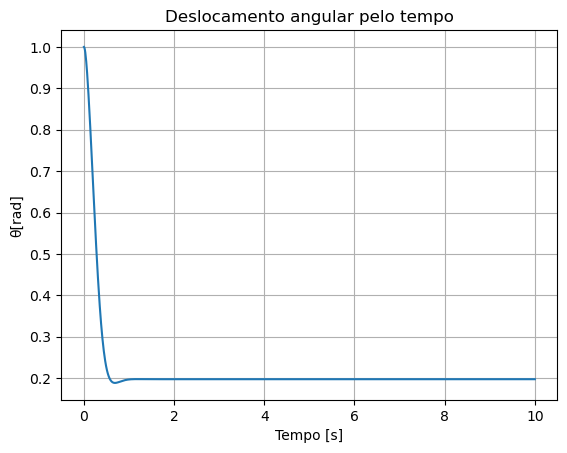

In [167]:
plt.figure()
plt.plot(tn,X[:,0])
plt.xlabel('Tempo [s]')
plt.ylabel(chr(952)+'[rad]')
plt.title('Deslocamento angular pelo tempo')
plt.grid(True)

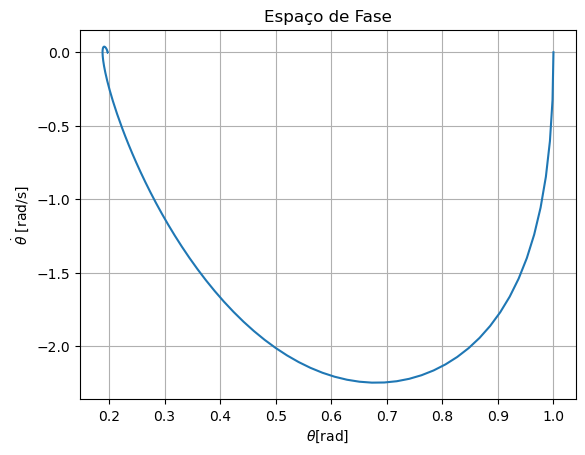

In [168]:
plt.figure()
plt.plot(X[:,0],X[:,1])
plt.xlabel(r'$\theta$[rad]')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
plt.title('Espaço de Fase')
plt.grid(True)

## 4.7 Forças de Inércia

Essas forças devem ser levadas em consideração quando o observador não está em um referencial inercial. **A Terceira Lei de Newton não se aplica às forças de inércia**. 

### Exemplo 5
Vamos voltar ao exemplo da formiga no ventilador e analisar as equações de movimento quando o observador também está no ventilador. 

In [172]:
Video("formiga2.mp4",width=700)

**Cinemática:**

In [174]:
R,theta = me.dynamicsymbols('R theta')

In [175]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
A.orient(N,'Axis',[theta,N.z])

In [176]:
O = me.Point('O')
O.set_vel(N,0)
P = me.Point('P')
pPO = R*A.x
P.set_pos(O,pPO)
P.set_vel(N,pPO.dt(N))
P.set_vel(A,pPO.dt(A))

A aceleração de $P$ em $N$, ${}^N \vec{a}^P$, é dada por:

In [178]:
acN = P.acc(N)
acN

(-R(t)*Derivative(theta(t), t)**2 + Derivative(R(t), (t, 2)))*A.x + (R(t)*Derivative(theta(t), (t, 2)) + 2*Derivative(R(t), t)*Derivative(theta(t), t))*A.y

A aceleração de $P$ em $A$, ${}^A \vec{a}^P$, é expressa da seguinte forma:

In [180]:
acA = P.acc(A)
acA

Derivative(R(t), (t, 2))*A.x

**Dinâmica:**

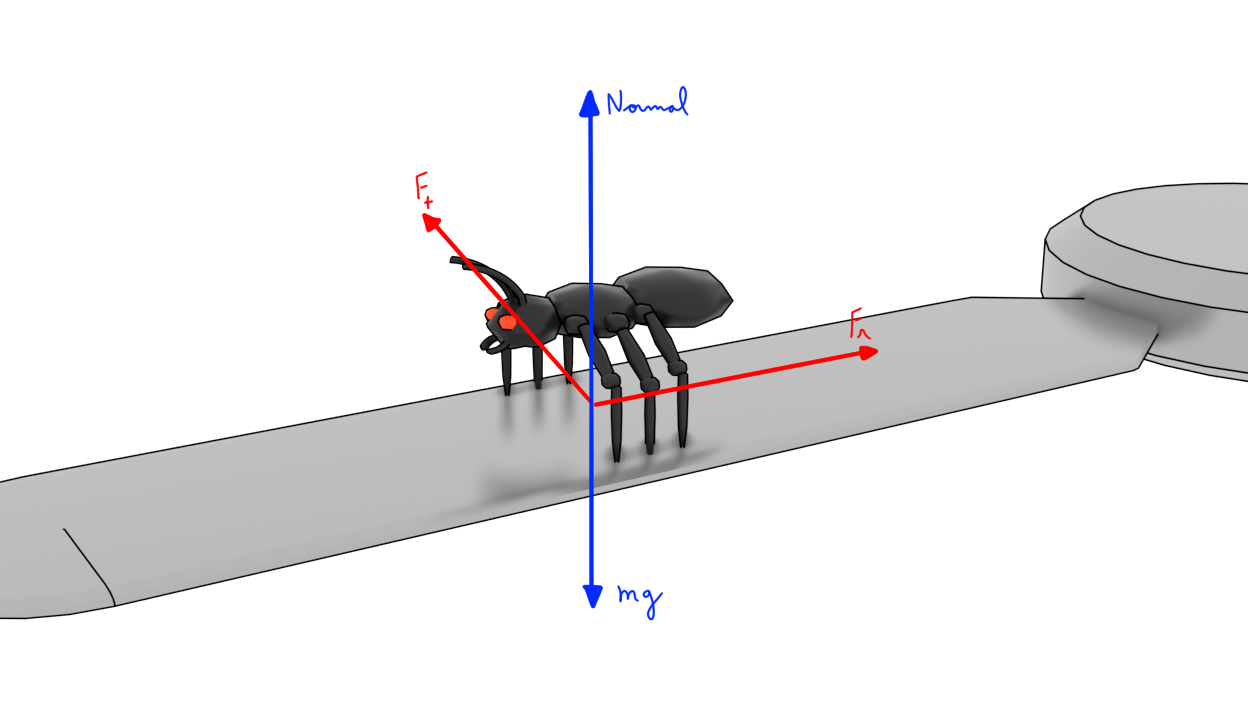

In [182]:
Image('formiga-cinetica.png',width=600)

In [183]:
m,g,Fr,Ft,Normal = symbols('m g F_t F_r F_{Normal}')

In [184]:
parP = me.Particle('P',P,m)

A resultante das forças será:

In [186]:
Res = (-m*g + Normal)*N.z - Fr*A.x - Ft*A.y
Res

(F_{Normal} - g*m)*N.z - F_t*A.x - F_r*A.y

O vetor quantidade de movimento linear da partícula $P$ em $N$, ${}^{N}\vec{G}{}^{P}$, será:

In [188]:
GP_N = parP.linear_momentum(N)
GP_N

m*Derivative(R(t), t)*A.x + m*R(t)*Derivative(theta(t), t)*A.y

Podemos obter as equações de movimento em um referencial inercial:

In [190]:
Eq_N = Res - GP_N.dt(N)
Eq_N

(F_{Normal} - g*m)*N.z + (-F_t + m*R(t)*Derivative(theta(t), t)**2 - m*Derivative(R(t), (t, 2)))*A.x + (-F_r - m*R(t)*Derivative(theta(t), (t, 2)) - 2*m*Derivative(R(t), t)*Derivative(theta(t), t))*A.y

Agora, vamos obter as equações de movimento para o referencial $A$: 

In [192]:
GP_A = parP.linear_momentum(A) # vetor quantidade de movimento linear de P em A
GP_A

m*Derivative(R(t), t)*A.x

In [193]:
Eq_A = Res - GP_A.dt(A) 
Eq_A

(F_{Normal} - g*m)*N.z + (-F_t - m*Derivative(R(t), (t, 2)))*A.x - F_r*A.y

Vamos comparar as equações de movimento no referencial $N$ e no referencial $A$:

In [195]:
Eq_N - Eq_A

m*R(t)*Derivative(theta(t), t)**2*A.x + (-m*R(t)*Derivative(theta(t), (t, 2)) - 2*m*Derivative(R(t), t)*Derivative(theta(t), t))*A.y

Observamos que, caso desejássemos obter as equações de movimento utilizando o referencial móvel - muitas vezes é o mais vantojoso -, precisaríamos incluir os termos mostrados na equação acima. Esses termos são chamados de **Forças de Inércia**.

As forças de inércia recebem os seguintes nomes: 
* $m R \dot{\theta}^{2}\mathbf{\hat{a}_x}$ é a **força centrífuga**;
* $-m R \ddot{\theta}\mathbf{\hat{a}_y}$ é a **força de Euler**;
* $- 2 m \dot{R} \dot{\theta} \mathbf{\hat{a}_y}$ é a **força de Coriolis**. 

In [198]:
F_in = Eq_N - Eq_A
F_in

m*R(t)*Derivative(theta(t), t)**2*A.x + (-m*R(t)*Derivative(theta(t), (t, 2)) - 2*m*Derivative(R(t), t)*Derivative(theta(t), t))*A.y

As equações de movimento para o referencial móvel podem ser obtididos de maneira correta da seguinte forma:

In [200]:
Eq_A_correto = Res + F_in - GP_A.dt(A)
Eq_A_correto

(F_{Normal} - g*m)*N.z + (-F_t + m*R(t)*Derivative(theta(t), t)**2 - m*Derivative(R(t), (t, 2)))*A.x + (-F_r - m*R(t)*Derivative(theta(t), (t, 2)) - 2*m*Derivative(R(t), t)*Derivative(theta(t), t))*A.y

De modo mais geral:

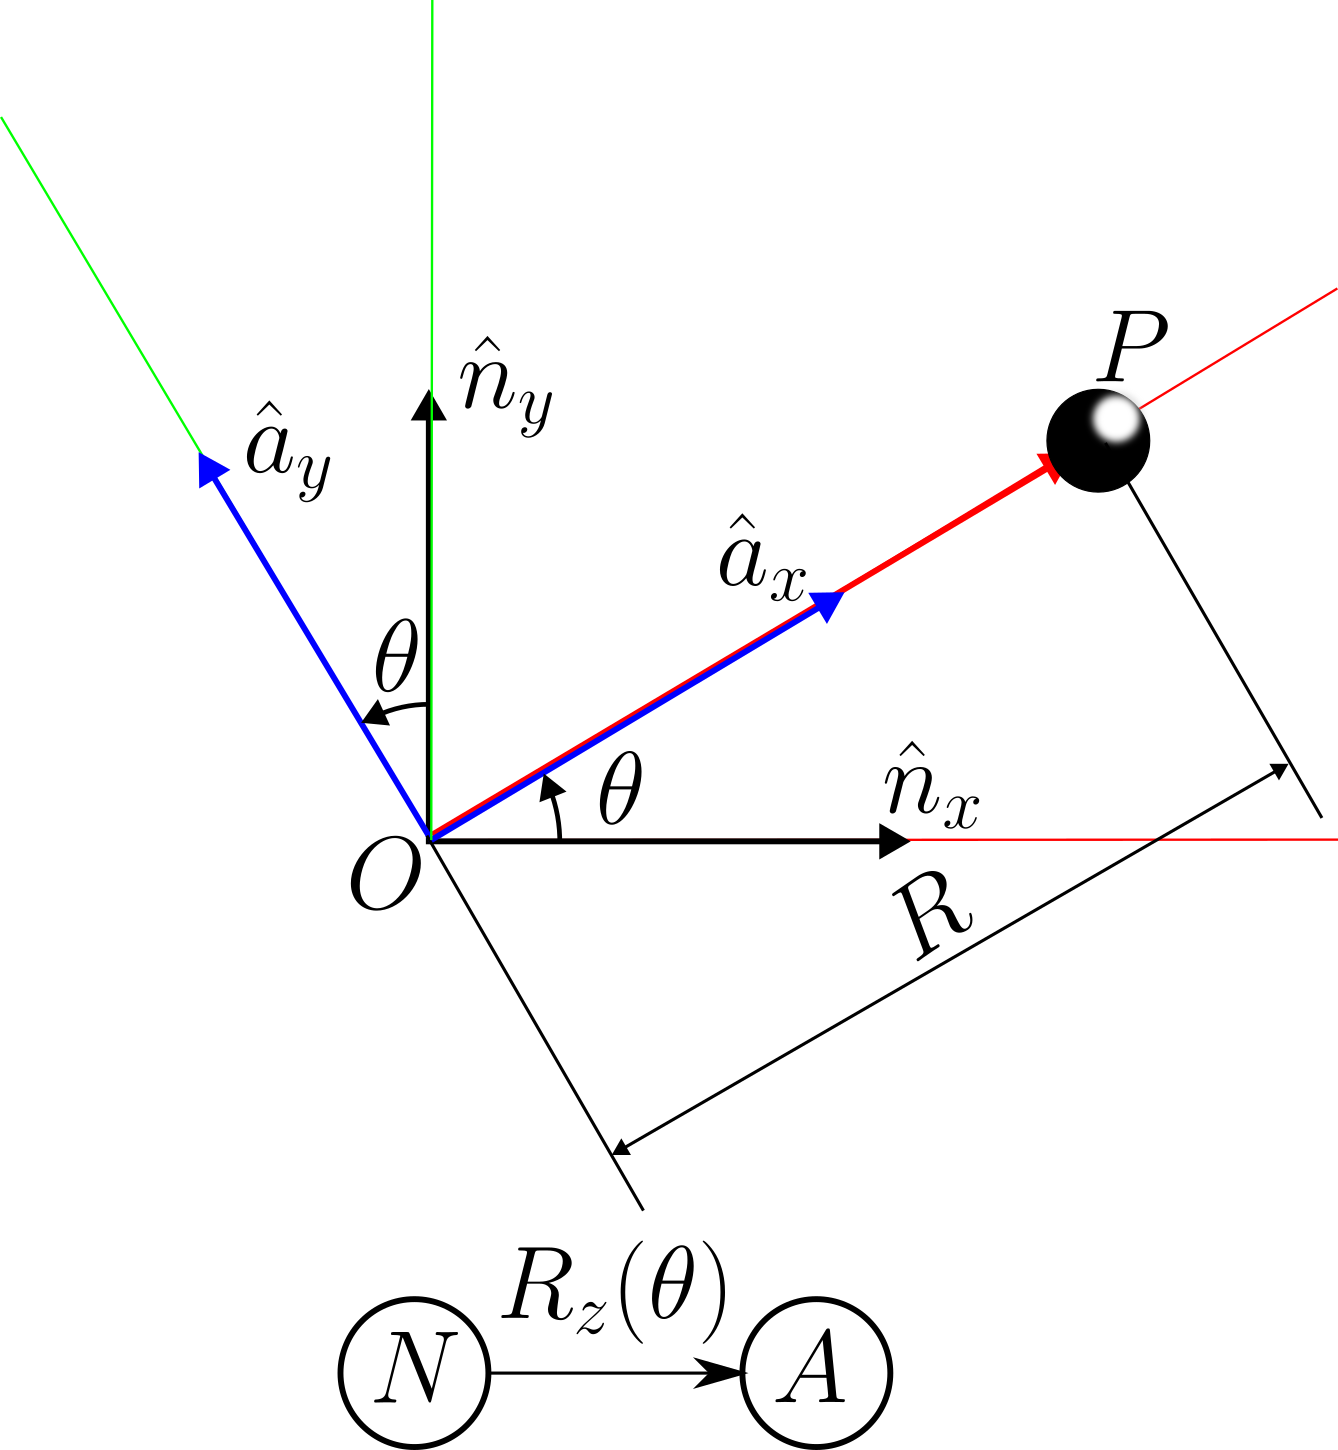

In [202]:
Image('RefMov07.png',width=600)

* **força centrífuga** = $-m \left( {}^{N}\vec{\omega}{}^{A} \times \left( {}^{N}\vec{\omega}{}^{A} \times \vec{p}^{P/O}\right) \right)$;
* **força de Euler** = $-m \left({}^{N}\vec{{\alpha}}{}^{A} \times \vec{p}^{P/O}\right) $;
* **força de Coriolis** = $-m \left(2 {}^{N}\vec{\omega}{}^{A} \times {}^{A}\vec{v}{}^{P} \right)$.

**Observação** <br>
Existe ainda a **força de Einstein**, torna-se necessário utilizá-la quando escrevemos o vetor posição do ponto de interesse em relação a um ponto que não é fixo, $O_1$. 
* **força de Einstein** $= -m \dfrac{{}^{N}d^2 \vec{p}{}^{O_1/O}}{dt^2}$

## 4.8 Momento de um Vetor

Seja um vetor deslizante $\vec{v}$ qualquer. O vetor $\vec{v}$ pertence a reta suporte $r$ Define-se o momento do vetor $\vec{v}$ em relação ao ponto $O$ como:

$ \vec{M}{}^{v/O} = \vec{p}{}^{P/O} \times \vec{v} $

Onde $\vec{p}{}^{P/O}$ é o vetor posição do ponto $P$, pertencente a reta suporte $r$, em relação ao ponto $O$.
* O vetor $\vec{M}{}^{v/O}$ é um vetor livre.

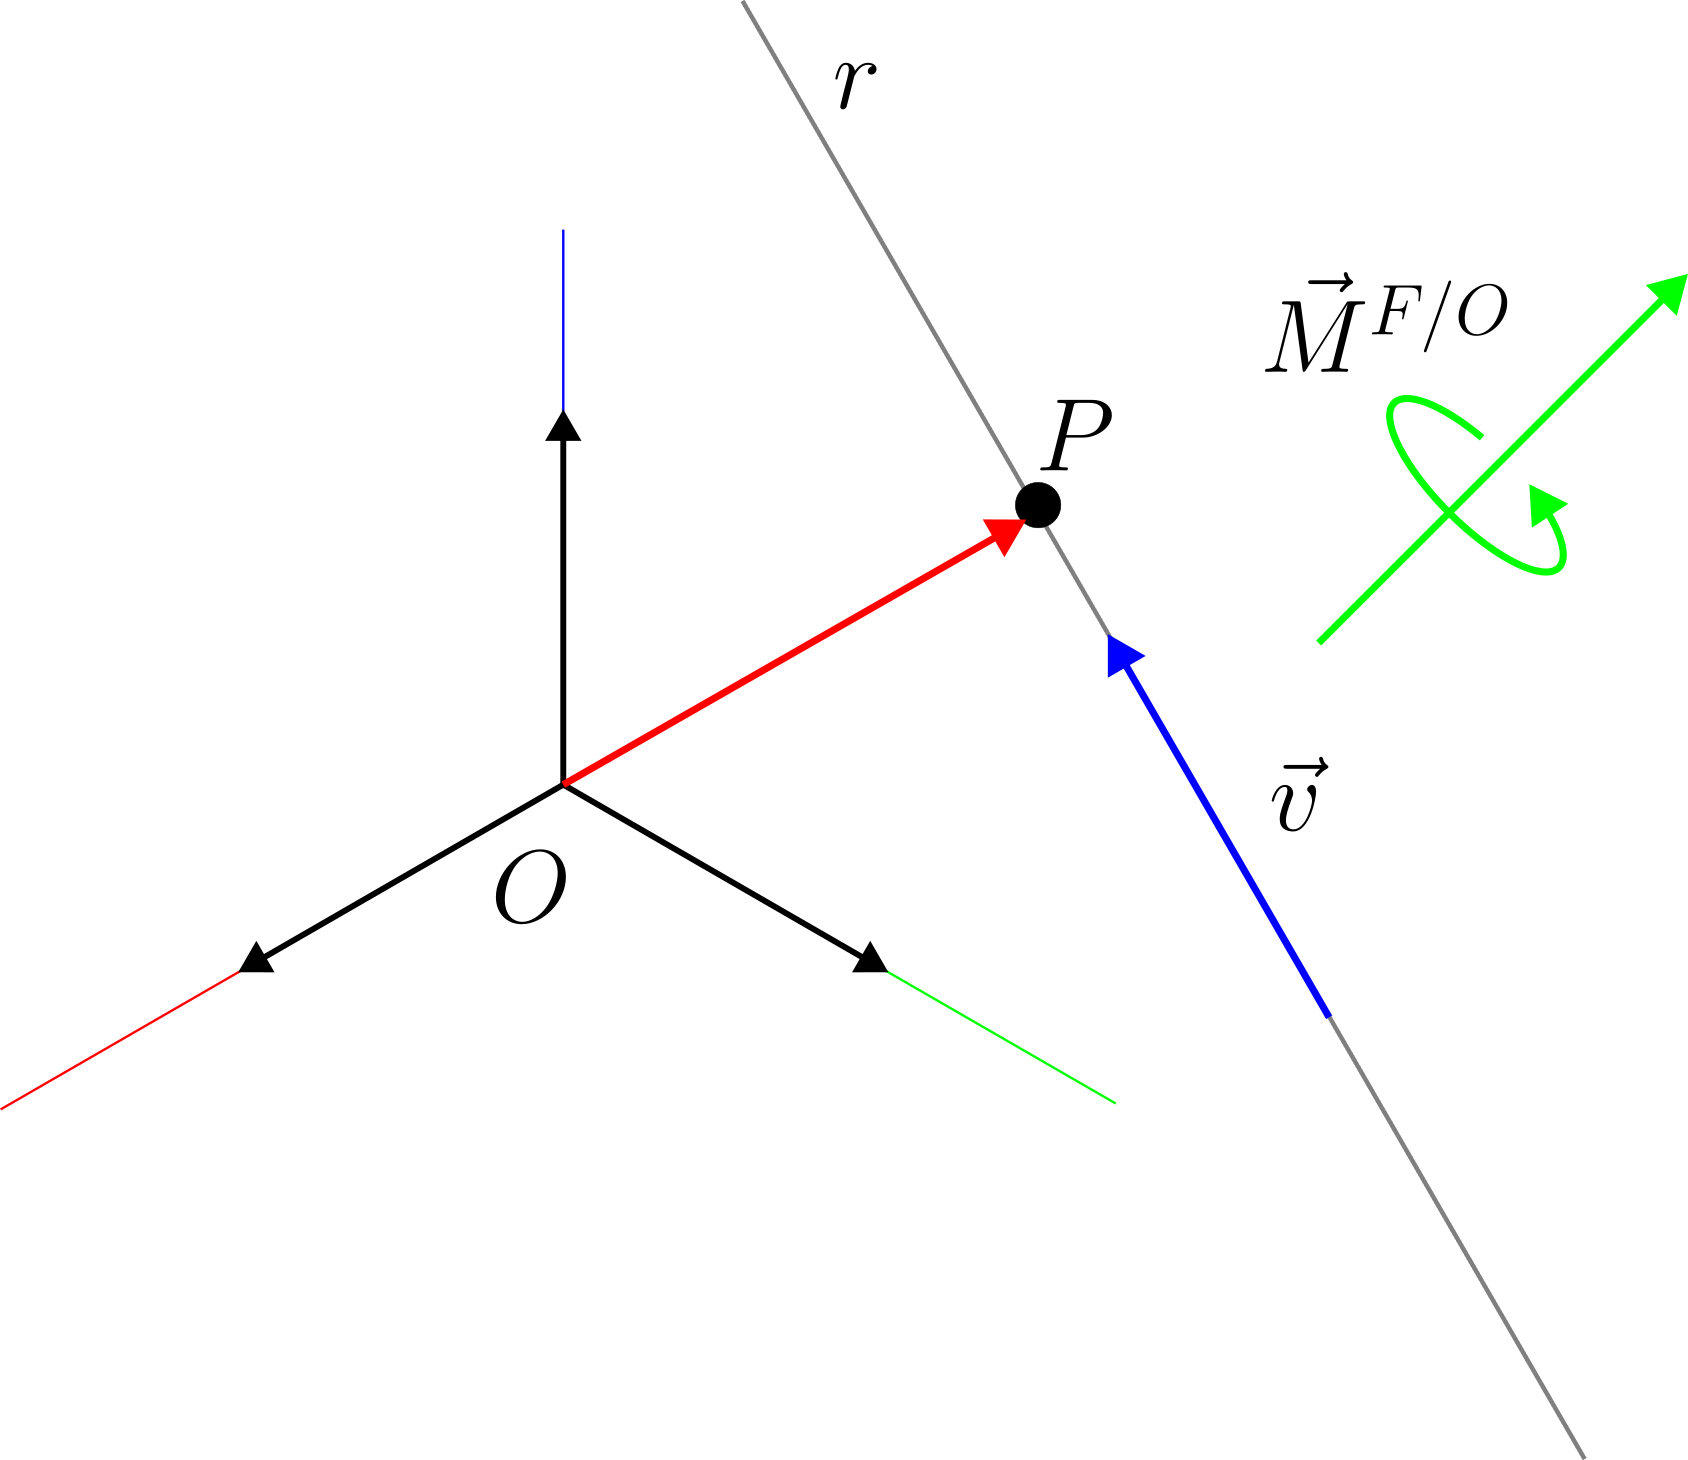

In [207]:
Image('partícula03.png',width=600)

In [208]:
a = symbols('a(:3)')
b = symbols('b(:3)')

In [209]:
v = a[0]*N.x + a[1]*N.y + a[2]*N.z
v

a0*N.x + a1*N.y + a2*N.z

In [210]:
p = b[0]*N.x + b[1]*N.y + b[2]*N.z
p

b0*N.x + b1*N.y + b2*N.z

In [211]:
M = p.cross(v)
M

(-a1*b2 + a2*b1)*N.x + (a0*b2 - a2*b0)*N.y + (-a0*b1 + a1*b0)*N.z

In [212]:
M = p ^ v
M

(-a1*b2 + a2*b1)*N.x + (a0*b2 - a2*b0)*N.y + (-a0*b1 + a1*b0)*N.z

## 4.9 Vetor Quantidade de Movimento Angular

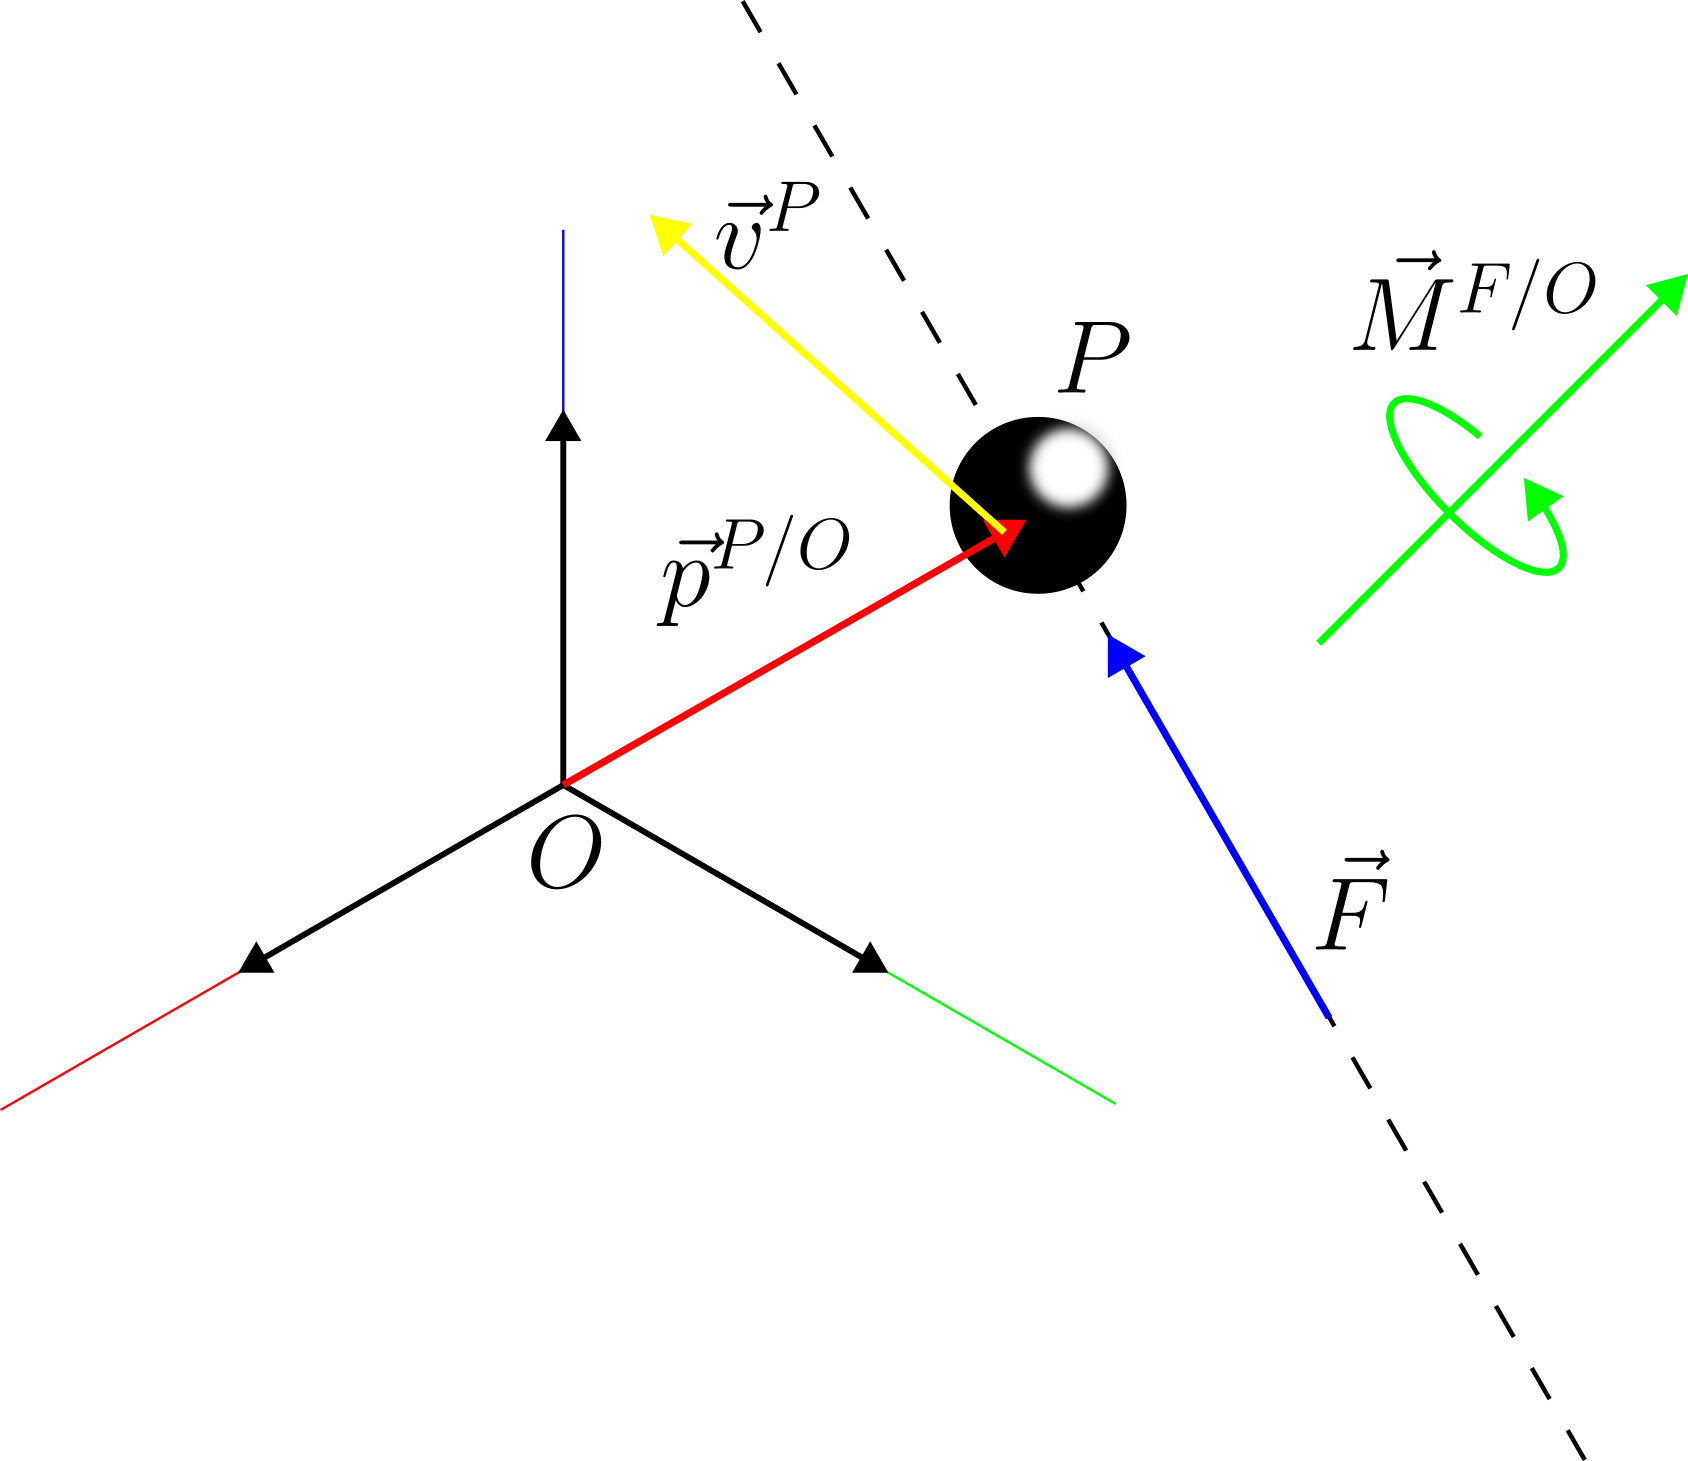

In [214]:
Image('partícula02.png',width=600)

Podemos definir o **o vetor quantidade de movimento angular da partícula $P$ em relação ao ponto $O$ como:** 

$ {}^{N} \vec{H}{}^{P/O} = \vec{p}{}^{P/O} \times {}^{N} \vec{G} {}^{P} $

Sabemos que: 

${}^{N} \vec{G} {}^{P} = m {}^{N} \vec{v}{}^{P} $

$ \vec{R} = m {}^{N} \vec{a}{}^{P} $

Onde $\vec{R}$ é o vetor resultante das forças atuando na partícula $P$.

Logo, temos que: 

$ {}^{N} \vec{H}{}^{P/O} = \vec{p}{}^{P/O} \times m {}^{N} \vec{v}{}^{P}$


Derivando os dois lados da equação no tempo:

$ {}^{N} \dot{\vec{H}}{}^{P/O} = \dot{\vec{p}}{}^{P/O} \times m {}^{N} \vec{v}{}^{P} + {\vec{p}}{}^{P/O} \times m {}^{N} \dot{\vec{v}}{}^{P}$

Ou seja:

$ {}^{N} \dot{\vec{H}}{}^{P/O} = {}^{N}{\vec{v}}{}^{P} \times m {}^{N} \vec{v}{}^{P} + {\vec{p}}{}^{P/O} \times m {}^{N} \vec{a}
{}^{P}$

Logo:

$ {}^{N} \dot{\vec{H}}{}^{P/O} = {\vec{p}}{}^{P/O} \times m {}^{N} \vec{a}
{}^{P}$

Como vimos anteriormente:

$ \vec{R} = m {}^{N} \vec{a}{}^{P} $

Onde $\vec{R}$ é o vetor resultante das forças atuando na partícula $P$.

Deste modo:

$\vec{p}{}^{P/O} \times \vec{R} = \vec{p}{}^{P/O} \times m {}^{N} \vec{a}{}^{P}$

$\vec{p}{}^{P/O} \times \vec{R} = \vec{M}^{R/O} $

$\vec{p}{}^{P/O} \times m {}^{N} \vec{a}{}^{P} = {}^{N} \dot{\vec{H}}{}^{P/O} $

Finalmente, chegamos a:

$\vec{M}^{R/O} = {}^{N} \dot{\vec{H}}{}^{P/O}$

### Exemplo 6

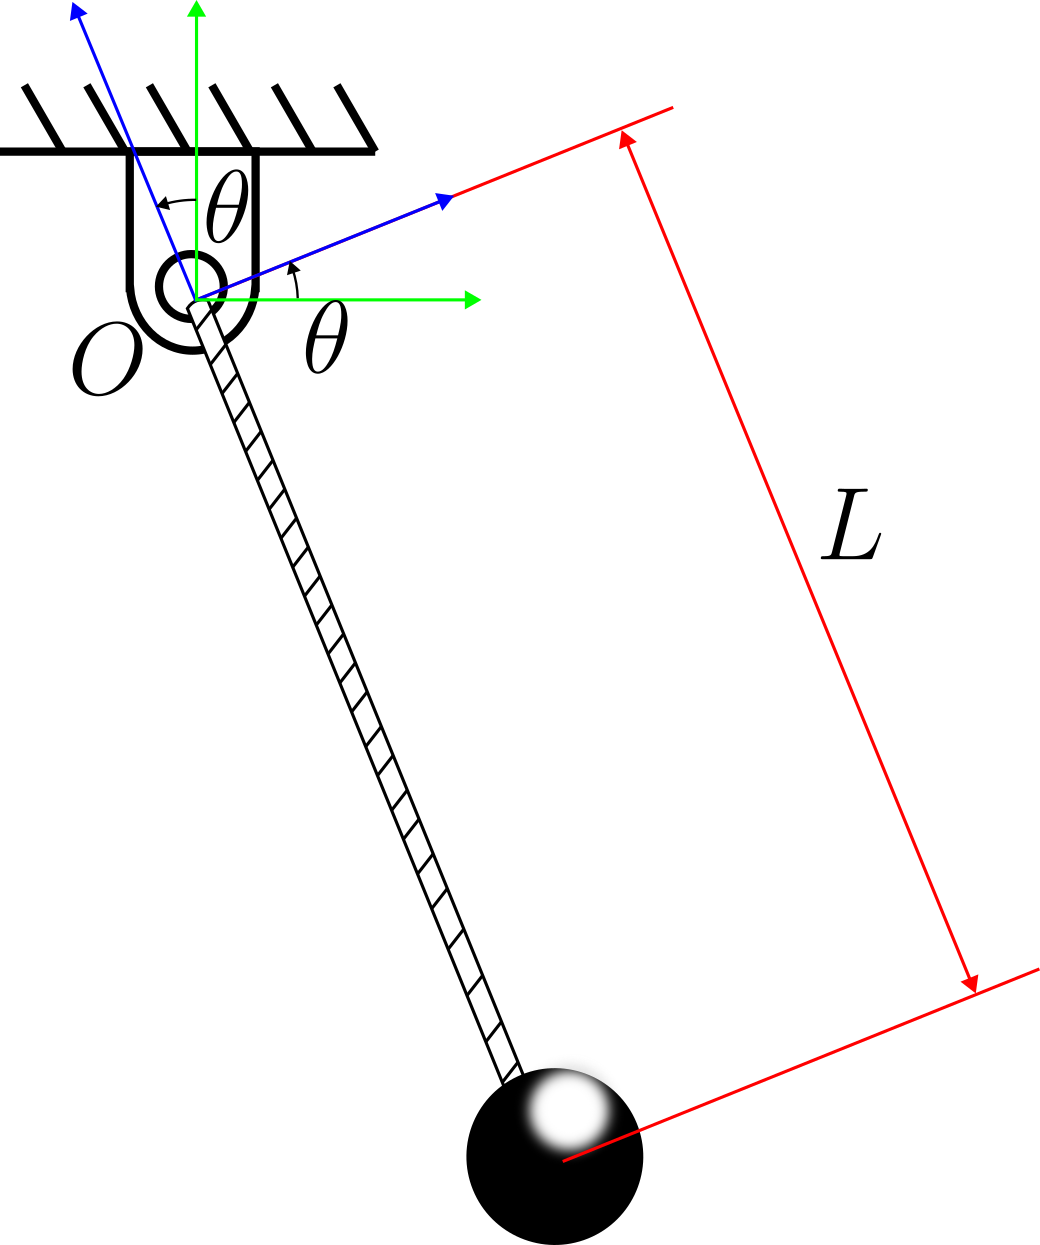

In [220]:
Image('pendulo.png',width=400)

Cinemática

In [222]:
L = symbols('L')
theta = me.dynamicsymbols('theta')

In [223]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')

In [224]:
A.orient(N,'Axis',[theta,N.z])

In [225]:
O = me.Point('O')
O.set_vel(N,0)

In [226]:
P = me.Point('P')
pPO = -L*A.y
P.set_pos(O,pPO)
P.set_vel(N,pPO.dt(N))

Dinâmica

In [228]:
m,g,T = symbols('m,g,T')

In [229]:
ParP = me.Particle('ParP',P,m)

In [230]:
R = -m*g*N.y + T*A.y
R

- g*m*N.y + T*A.y

In [231]:
M_RO = P.pos_from(O).cross(R)
M_RO

- L*g*m*sin(theta(t))*N.z

In [232]:
H = ParP.angular_momentum(O,N)

In [233]:
Eq_mov = M_RO - H.dt(N)
Eq_mov

- L*g*m*sin(theta(t))*N.z - L**2*m*Derivative(theta(t), (t, 2))*A.z

In [234]:
Eq_mov_z = Eq_mov.dot(A.z)
Eq_mov_z

-L**2*m*Derivative(theta(t), (t, 2)) - L*g*m*sin(theta(t))

In [235]:
theta_2pontos = solve(Eq_mov_z,theta.diff(t,2))[0]
theta_2pontos

-g*sin(theta(t))/L

In [236]:
parametros = {L:0.5,m:1,g:9.8}

In [237]:
def Sistema(X,tn):
    thpp = theta_2pontos.subs(parametros)
    thpp = thpp.subs(theta,X[0])
    X_ponto = [X[1],thpp]
    return X_ponto

In [238]:
X0 = [0,1]
tempo = linspace(0,10,1000)

In [239]:
X = odeint(Sistema,X0,tempo)

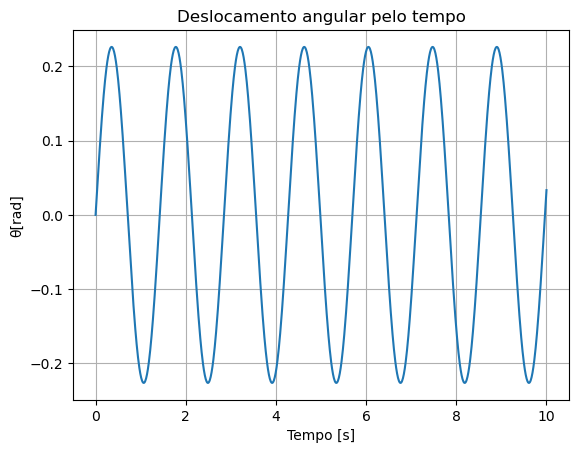

In [240]:
plt.figure()
plt.plot(tempo,X[:,0])
plt.xlabel('Tempo [s]')
plt.ylabel(chr(952)+'[rad]')
plt.title('Deslocamento angular pelo tempo')
plt.grid(True)

## 4.10 Propriedades de Inércia de uma Partícula

### 4.10.1 Momento de Inércia
Voltando ao exemplo do pêndulo, vamos olhar mais atentamente ao vetor $\dot{\vec{H}}{}^{P/O}$

In [243]:
H_ponto = H.dt(N)
H_ponto

L**2*m*Derivative(theta(t), (t, 2))*A.z

In [244]:
print(me.mlatex(H_ponto))

L^{2} m \ddot{\theta}\mathbf{\hat{a}_z}


$L^{2} m $ é chamado de **Momento de Inércia** da partícula P em relação a $\mathbf{\hat{a}_z}$

### 4.10.2 Vetor de Inércia

Vamos olhar para um exemplo mais genérico:

Suponha que a posição da partícula $P$ para um instante de tempo qualquer é descrita por:

$\vec{p}{}^{P/O} = x \mathbf{\hat{a}}$

Onde $x$ é uma função do tempo e $\mathbf{\hat{a}}$ é um vetor unitário de uma base móvel. A velocidade de $P$ pode ser obtida por:

$\dot{\vec{p}}{}^{P/O} = {}^{N}\vec{v}^{P} = \dot{x}\mathbf{\hat{a}} + {}^{N}\vec{\omega}{}^{A} \times x \mathbf{\hat{a}} $

Obtendo o vetor quantidade de movimento angular da partícula $P$ em relação ao ponto $O$:

$\vec{p}{}^{P/O} \times m {}^{N}\vec{v}^{P} = x \mathbf{\hat{a}} \times m \left( \dot{x}\mathbf{\hat{a}} + {}^{N}\vec{\omega}{}^{A} \times x \mathbf{\hat{a}} \right) $


Vamos supor que ${}^{N}\vec{\omega}{}^{A} = \dot{\theta}\mathbf{\hat{a}_{\theta}}$, onde $\mathbf{\hat{a}_{\theta}}$ é o vetor unitário relativo ao eixo de rotação. Fazendo essa substituição na equação e zerando o produto vetorial de dois vetores na mesma direção:

$\vec{p}{}^{P/O} \times m {}^{N}\vec{v}^{P} = x \mathbf{\hat{a}} \times m \left(\dot{\theta}\mathbf{\hat{a}_{\theta}} \times x \mathbf{\hat{a}} \right) $

Reorganizando os termos escalares:

$\vec{p}{}^{P/O} \times m {}^{N}\vec{v}^{P} = {}^{N}\vec{H}{}^{P/O} =  m x \mathbf{\hat{a}} \times  \left(\mathbf{\hat{a}_{\theta}} \times x\mathbf{\hat{a}} \right)\dot{\theta} $

Lembrando que $\vec{p}{}^{P/O} = x \mathbf{\hat{a}}$:

${}^{N}\vec{H}{}^{P/O} =  m\vec{p}{}^{P/O} \times  \left(\mathbf{\hat{a}_{\theta}} \times \vec{p}{}^{P/O} \right)\dot{\theta} $

Podemos definir o **Vetor de Inércia** da partícula $P$ em relação ao ponto $O$ como:

$ \vec{I}{}^{P/O}_{a_{\theta}} = m\vec{p}{}^{P/O} \times  \left(\mathbf{\hat{a}_{\theta}} \times \vec{p}{}^{P/O} \right)$

Definimos o **Momento de Inércia** como:

$ {I}^{P/O}_{a_{\theta}} = \vec{I}{}^{P/O}_{a_{\theta}} \cdot \mathbf{\hat{a}_{\theta}}$

Definimos o **Produto de Inércia** como:

$ {I}^{P/O}_{a_{\theta}b} = \vec{I}{}^{P/O}_{a_{\theta}} \cdot \mathbf{\hat{b}}$

Deste modo:

${}^{N}\vec{H}^{P/O} = {I}^{P/O}_{a_{\theta}} {}^{N}\vec{\omega}^{A}$

### 4.10.3 Tensor de Inércia

Observamos que os Momentos de Inércia, Vetores de Inércia e Produtos de Inércia são restritos a uma direção específica, de modo que não é útil utilizá-los para obter o vetor quantidade de movimento angular de uma partícula que possua uma velocidade angular não-simples. 
Define-se então o **Tensor de Inércia** da partícula $P$ em relação a $O$ $\underline{I}^{P/O}$, de modo que:

$ \underline{I}^{P/O} \cdot \mathbf{\hat{a}_{\theta}} = \vec{I}{}^{P/O}_{a_{\theta}}$

ou:

$\mathbf{\hat{a}_{\theta}} \cdot \underline{I}^{P/O} = \vec{I}{}^{P/O}_{a_{\theta}}$

Logo, o Momento de Inércia pode ser obitdo como:

$ {I}^{P/O}_{a_{\theta}} = \mathbf{\hat{a}_{\theta}} \cdot \underline{I}^{P/O} \cdot \mathbf{\hat{a}_{\theta}}$

Podemos definir o **Tensor de Inércia** da partícula $P$ em relação ao ponto $O$ como:

$\underline{I}^{P/O} = \left(\vec{p}{}^{P/O} \cdot \vec{p}{}^{P/O} \underline{1} - \vec{p}{}^{P/O} \otimes \vec{p}{}^{P/O} \right)m $

In [254]:
I = me.inertia_of_point_mass(m,pPO,A)
I

L**2*m*(A.x|A.x) + L**2*m*(A.z|A.z)

In [255]:
I.to_matrix(A)

Matrix([
[L**2*m, 0,      0],
[     0, 0,      0],
[     0, 0, L**2*m]])

[Voltar para o capítulo anterior](Din3.ipynb)     $\qquad$   [Avançar para o próximo capítulo](Din5.ipynb)